In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rbo
import warnings
from sklearn.metrics import jaccard_similarity_score
warnings.filterwarnings("ignore")

# pd.set_option('display.max_columns',100)
# pd.set_option('display.max_rows',100)
sns.set_style("ticks")
 
# Smallest context:
sns.set_context("paper")
sns.set(rc={'figure.figsize':(10,8)})

In [132]:
df = pd.read_csv("../data.csv",index_col=0)

In [133]:
df.columns

Index(['Survey Id', 'Keyword Id', 'Keyword Content', 'Country Of Origin Id',
       'Country Of Origin Label', 'Country Id', 'Country Label', 'Province Id',
       'Province Label', 'Age Group Id', 'Age Group Label', 'Gender Label',
       'Share Device', 'Mobile Type', 'Degree', 'Rank Pandemic',
       'Source Information Id', 'Source Information Label', 'Result Item Rank',
       'Result Item Title', 'Result Item Metadesc', 'Result Item Created At',
       'Result Item Full Url', 'Result Item Full Domain',
       'Google Tracked Country', 'Google Tracked Address',
       'Result Item Openrank', 'Keyword Openrank Average',
       'Survey Openrank Average', 'Html File'],
      dtype='object')

In [134]:
dff = df.copy()

In [135]:
dff.head()

Survey Id  Keyword Id                            Keyword Content  \
Unique Id                                                                     
1                  4           9  is hydroxychloroquine effective for covid   
2                  4           9  is hydroxychloroquine effective for covid   
3                  4           9  is hydroxychloroquine effective for covid   
4                  4           9  is hydroxychloroquine effective for covid   
5                  4           9  is hydroxychloroquine effective for covid   

           Country Of Origin Id Country Of Origin Label  Country Id  \
Unique Id                                                             
1                            60                 Germany          60   
2                            60                 Germany          60   
3                            60                 Germany          60   
4                            60                 Germany          60   
5                            60                 Germany          60   

          Country Label  Province Id Province Label  Age Group Id  ...  \
Unique Id                                                          ...   
1               Germany          954         Hessen             4  ...   
2               Germany          954         Hessen             4  ...   
3               Germany          954         Hessen             4  ...   
4               Germany          954         Hessen             4  ...   
5               Germany          954         Hessen             4  ...   

                                        Result Item Metadesc  \
Unique Id                                                      
1          Jul 8, 2020 -  The outbreak of coronavirus dis...   
2          Sep 22, 2020 -  Hydroxychloroquine, an FDA-app...   
3          Arshad et al. show evidence for reduced mortal...   
4          There are studies looking at using these drugs...   
5          Hydroxychloroquine has been suggested for the ...   

          Result Item Created At  \
Unique Id                          
1                    Jul 8, 2020   
2                   Sep 22, 2020   
3                            NaN   
4                            NaN   
5                            NaN   

                                        Result Item Full Url  \
Unique Id                                                      
1          https://www.nature.com/articles/s41419-020-2721-8   
2          https://www.drugs.com/medical-answers/hydroxyc...   
3          https://www.ijidonline.com/article/S1201-9712(...   
4                          https://www.bbc.com/news/51980731   
5                    https://www.nps.org.au/hcq-and-covid-19   

          Result Item Full Domain Google Tracked Country  \
Unique Id                                                  
1                      nature.com                Germany   
2                       drugs.com                Germany   
3                  ijidonline.com                Germany   
4                         bbc.com                Germany   
5                      nps.org.au                Germany   

           Google Tracked Address  Result Item Openrank  \
Unique Id                                                 
1                      Heppenheim                    81   
2                      Heppenheim                    77   
3                      Heppenheim                    51   
4                      Heppenheim                    81   
5                      Heppenheim                    60   

          Keyword Openrank Average  Survey Openrank Average  \
Unique Id                                                     
1                            72.44                    71.56   
2                            72.44                    71.56   
3                            72.44                    71.56   
4                            72.44                    71.56   
5                            72.44                    71.56   

            

### •	For each of the 10 queries, how similar or different are the results across the 50 participants?

In [136]:
query_dict = {}
query_dict_1 = {}
for i in dff.groupby("Keyword Id"):
    dumy = i[1]
    print("Query ID : {}   Content : {}".format(i[0],dumy["Keyword Content"].values[0]))
    qd = {}
    qd_1 = {}
    for survey in dumy.groupby("Survey Id"):
        s_df = survey[1]
        qd[survey[0]] = s_df["Result Item Full Url"].to_list()
        qd_1[survey[0]] = s_df["Result Item Full Domain"].to_list()
        
    query_dict[i[0]] = qd
    query_dict_1[i[0]] = qd_1

Query ID : 1   Content : should i get tested for covid
Query ID : 2   Content : should i not get tested for covid
Query ID : 3   Content : should i get flu shot
Query ID : 4   Content : should i not get flu shot
Query ID : 5   Content : should i get vaccinated
Query ID : 6   Content : should i avoid get vaccinated
Query ID : 7   Content : should i wear facemask
Query ID : 8   Content : should i not wear facemask
Query ID : 9   Content : is hydroxychloroquine effective for covid
Query ID : 10   Content : is hydroxychloroquine ineffective for covid


In [56]:

d1 = pd.DataFrame()
d2 = pd.DataFrame()
d3 = pd.DataFrame()

dd1 = pd.DataFrame()
dd2 = pd.DataFrame()
dd3 = pd.DataFrame()

for num in range(1,11):
#     print(num)
    ls = query_dict[num]
    ls_1 = query_dict_1[num]
    
#     print(ls)
    averages = {}
    averages_2 = {}
    averages_3 = {}
#     print(len(ls))
    daverages = {}
    daverages_2 = {}
    daverages_3 = {}
    
    for idx1, i in enumerate(ls.items()):
#         print(i[0])
#         print(i[1])
        scores = []
        scores_2 = []
        scores_3 = []
        
        for idx2, j in enumerate(ls.items()):
            if idx1 != idx2:
#                 print(len(i[1]),len(j[1]))
                score = rbo.RankingSimilarity(i[1],j[1]).rbo(p=1)
                scores.append(score)
                
                score_2 = rbo.RankingSimilarity(i[1],j[1]).rbo(p=0.67)
                scores_2.append(score_2)
                
                v = min(len(i[1]),len(j[1]))
                score_3 = jaccard_similarity_score(i[1][:v],j[1][:v])
                scores_3.append(score_3)
                
#          # Average of 49 RBO values for a single survey for a particular query
#          # to know how similar or different this particular query of survey was comapred with 49 other surveys search results
#         print(scores)
        avg = sum(scores)/len(scores)
        averages[i[0]] = avg
        
        avg_2 = sum(scores_2)/len(scores_2)
        averages_2[i[0]] = avg_2
        
        avg_3 = sum(scores_3)/len(scores_3)
        averages_3[i[0]] = avg_3
                

                    
    for idx1, i in enumerate(ls_1.items()):
        
        dscores = []
        dscores_2 = []
        dscores_3 = []
        
        for idx2, j in enumerate(ls_1.items()):
            if idx1 != idx2:
                o1 = []
                o2 = []
                
                for q in i[1]:
                    if q not in o1:
                        o1.append(q)
                        
                for q in j[1]:
                    if q not in o2:
                        o2.append(q)

                dscore = rbo.RankingSimilarity(o1,o2).rbo(p=1)
                dscores.append(dscore)
                
                dscore_2 = rbo.RankingSimilarity(o1,o2).rbo(p=0.67)
                dscores_2.append(dscore_2)
                
                v = min(len(o1),len(o2))
                dscore_3 = jaccard_similarity_score(o1[:v],o2[:v])
                dscores_3.append(dscore_3)
                
                
        davg = sum(dscores)/len(dscores)
        daverages[i[0]] = davg
        
        davg_2 = sum(dscores_2)/len(dscores_2)
        daverages_2[i[0]] = davg_2
        
        davg_3 = sum(dscores_3)/len(dscores_3)
        daverages_3[i[0]] = davg_3


# #     print(len(averages))
    d = pd.DataFrame({'Query {}'.format(num):averages})
    d1 = pd.concat([d,d1], ignore_index=True, axis=1)
    
    d_2 = pd.DataFrame({'Query {}'.format(num):averages_2})
    d2 = pd.concat([d_2,d2], ignore_index=True, axis=1)
    
    d_3 = pd.DataFrame({'Query {}'.format(num):averages_3})
    d3 = pd.concat([d_3,d3], ignore_index=True, axis=1)
    
    # #     print(len(averages))
    dd = pd.DataFrame({'Query {}'.format(num):daverages})
    dd1 = pd.concat([dd,dd1], ignore_index=True, axis=1)
    
    dd_2 = pd.DataFrame({'Query {}'.format(num):daverages_2})
    dd2 = pd.concat([dd_2,dd2], ignore_index=True, axis=1)
    
    dd_3 = pd.DataFrame({'Query {}'.format(num):daverages_3})
    dd3 = pd.concat([dd_3,dd3], ignore_index=True, axis=1)
    

In [57]:
d1.columns = ["Query {}".format(i) for i in range(1,11)]
d2.columns = ["Query {}".format(i) for i in range(1,11)]
d3.columns = ["Query {}".format(i) for i in range(1,11)]

dd1.columns = ["Query {}".format(i) for i in range(1,11)]
dd2.columns = ["Query {}".format(i) for i in range(1,11)]
dd3.columns = ["Query {}".format(i) for i in range(1,11)]

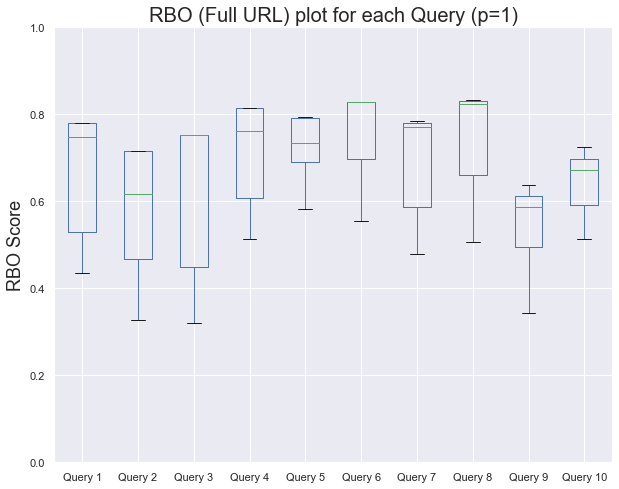

In [58]:

d1.plot(kind='box')
plt.ylim([0,1])
plt.title("RBO (Full URL) plot for each Query (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=18)
plt.show()

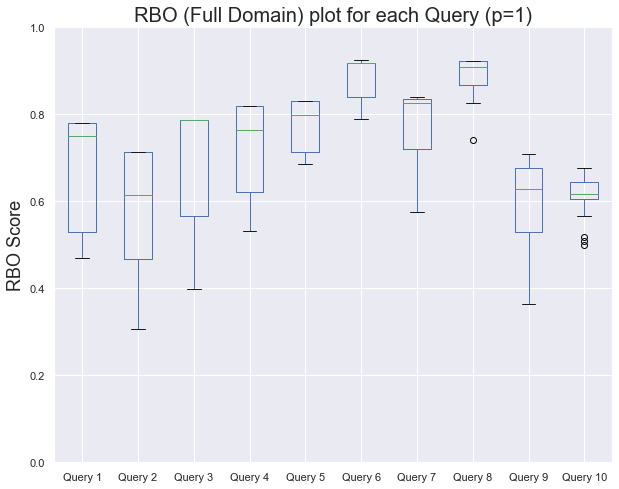

In [59]:
dd1.plot(kind='box')
plt.ylim([0,1])
plt.title("RBO (Full Domain) plot for each Query (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=18)
plt.show()

### o	Where are the differences? (E.g. are the differences near the top or bottom of the list?)

Rank-biased overlap falls in the range [0, 1], where 0 means disjoint, and 1 means identical. The parameter p determines how steep the decline in weights is: the smaller p, the
more top-weighted the metric is. In the limit, when p = 0, only the top-ranked item is
considered, and the RBO score is either zero or one. On the other hand, as p approaches
arbitrarily close to 1, the weights become arbitrarily flat, and the evaluation becomes arbitrarily deep.

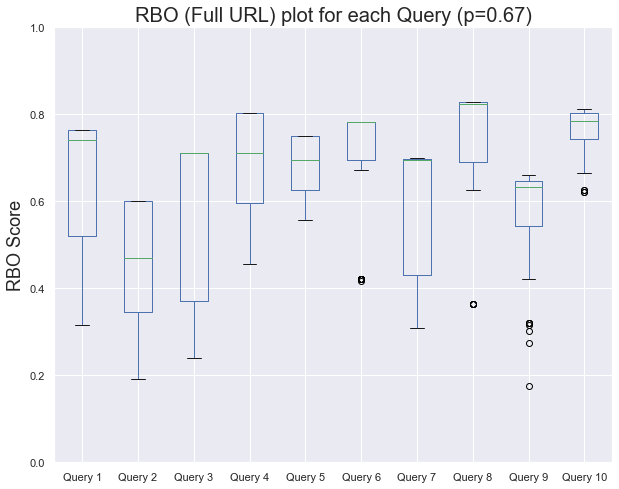

In [60]:
d2.plot(kind='box')
plt.ylim([0,1])
plt.title("RBO (Full URL) plot for each Query (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=18)
plt.show()

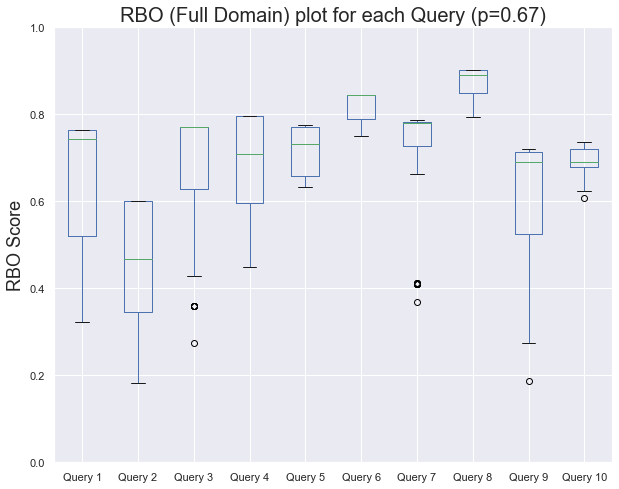

In [61]:
dd2.plot(kind='box')
plt.ylim([0,1])
plt.title("RBO (Full Domain) plot for each Query (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=18)
plt.show()

In [62]:
vals = dff.set_index("Survey Id").groupby(level=0)["Country Label"].agg("max").to_dict().values()
country_series = dff.set_index("Survey Id").groupby(level=0)["Country Label"].agg("max")
set(vals)
country_colorss = {'Brazil':"orange", 'Germany':"blue", 'India':"red", 'Spain':"purple", 'United States':"green"}

In [63]:

d2_dumy = d2.copy()
d2_dumy["country"] = country_series
d2_dumy["color"] = d2_dumy["country"].map(country_colorss)
country_colors = d2_dumy["color"]

### Plotting Outliers for Queries

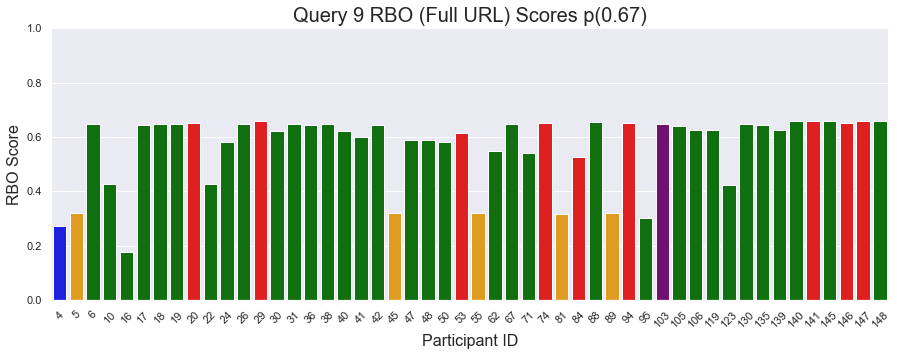

In [64]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=d2.index,y=d2['Query 9'],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("Query 9 RBO (Full URL) Scores p(0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

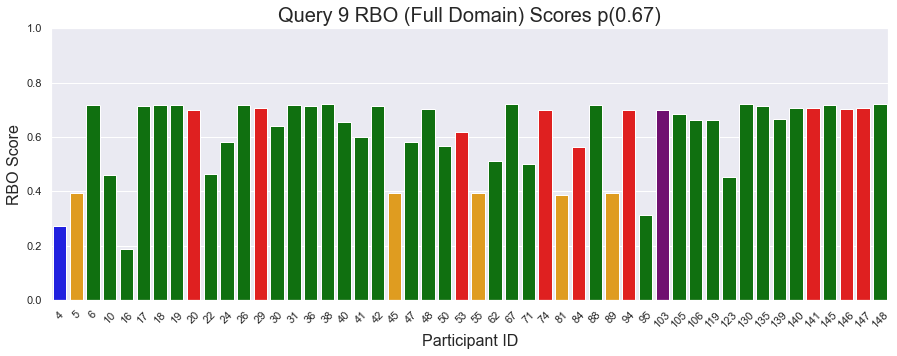

In [65]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=dd2.index,y=dd2['Query 9'],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("Query 9 RBO (Full Domain) Scores p(0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

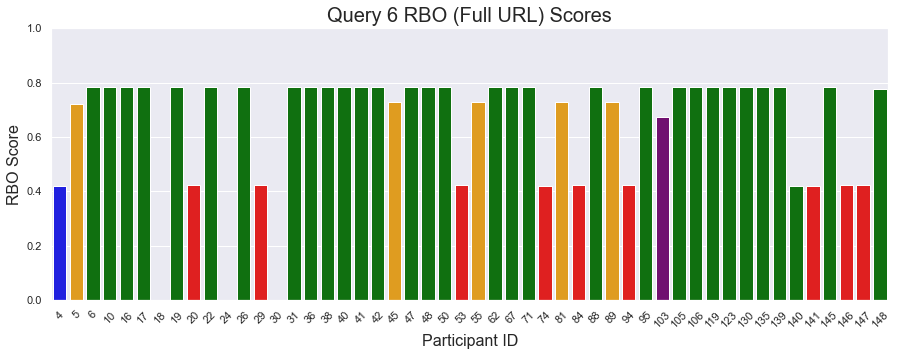

In [66]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=d2.index,y=d2['Query 6'],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("Query 6 RBO (Full URL) Scores",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

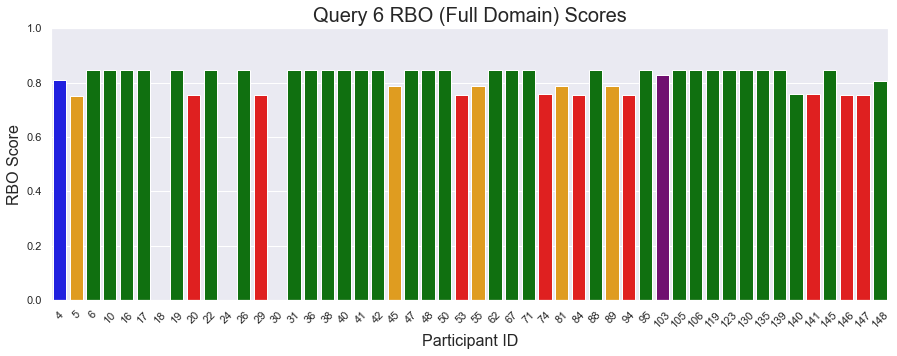

In [67]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=dd2.index,y=dd2['Query 6'],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("Query 6 RBO (Full Domain) Scores",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

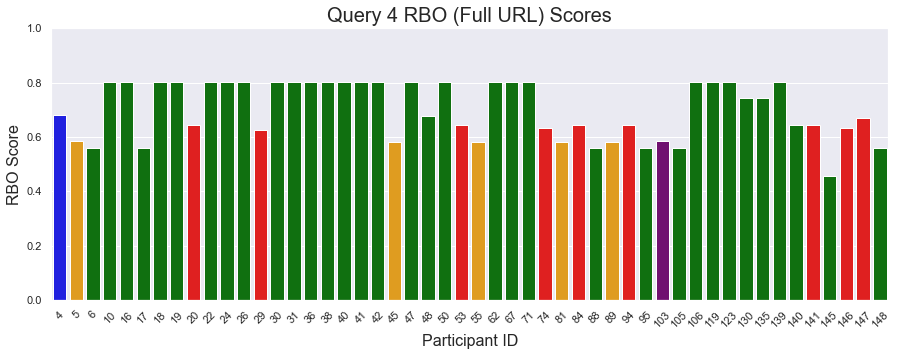

In [68]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=d2.index,y=d2['Query 4'],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("Query 4 RBO (Full URL) Scores",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

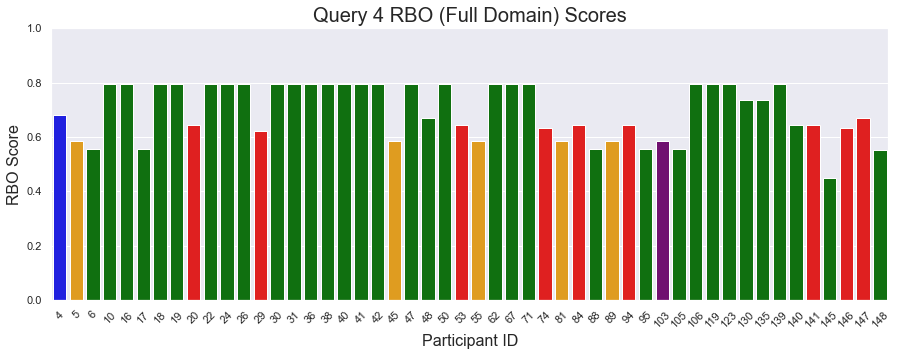

In [69]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=dd2.index,y=dd2['Query 4'],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("Query 4 RBO (Full Domain) Scores",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [70]:
country_dict = df.set_index("Survey Id")[["Country Label"]].groupby(level=0).agg('max').to_dict()["Country Label"]

In [71]:
d1country = pd.melt(d1.T)
d1country["country"] = d1country["variable"].map(country_dict)
d1country.head()

variable     value  country
0         4  0.435739  Germany
1         4  0.421045  Germany
2         4  0.321406  Germany
3         4  0.637333  Germany
4         4  0.582339  Germany

In [72]:
dd1country = pd.melt(dd1.T)
dd1country["country"] = dd1country["variable"].map(country_dict)
dd1country.head()

variable     value  country
0         4  0.469739  Germany
1         4  0.422645  Germany
2         4  0.398234  Germany
3         4  0.647575  Germany
4         4  0.734730  Germany

In [73]:
d1country

variable     value        country
0           4  0.435739        Germany
1           4  0.421045        Germany
2           4  0.321406        Germany
3           4  0.637333        Germany
4           4  0.582339        Germany
..        ...       ...            ...
495       148  0.793361  United States
496       148  0.771151  United States
497       148  0.656762  United States
498       148  0.638047  United States
499       148  0.678686  United States

[500 rows x 3 columns]

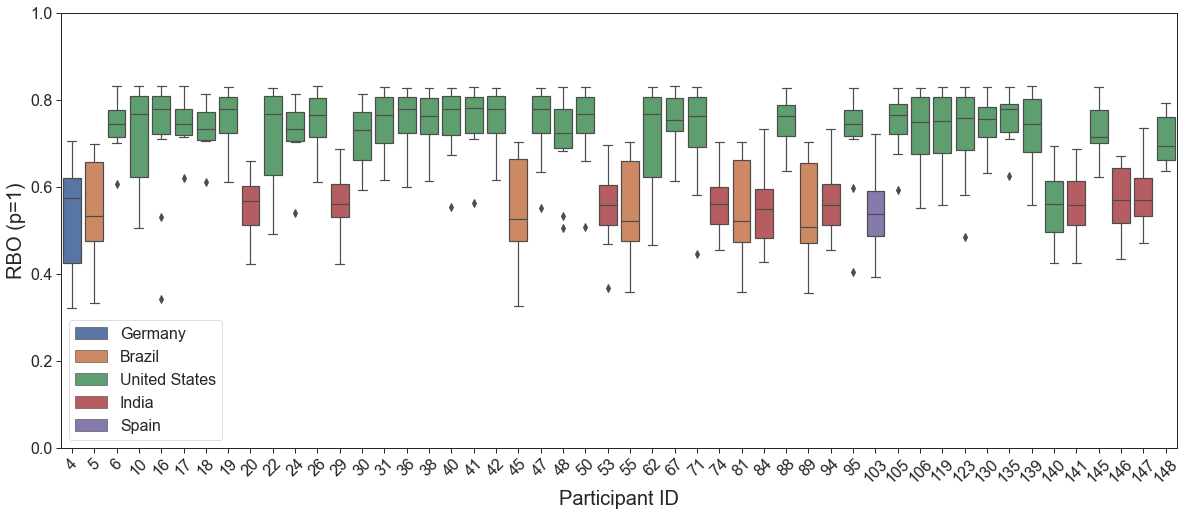

In [74]:
sns.set(rc={'figure.figsize':(20,8)})
d1country.rename({'country':'Country'},inplace=True,axis=1)
sns.set_style("ticks")
# Smallest context:
sns.set_context("paper")
#sns.set(rc={'figure.figsize':(10,8)})
plt.yticks(fontsize=16)
sns.boxplot(x="variable", y="value", data=d1country,hue=d1country['Country'],dodge=False)
plt.xticks(rotation=45, fontsize=16)
plt.legend(fontsize=16)
#plt.title("RBO (Full URL) Box plot for each Survey (p=1)",fontsize=20)
plt.ylabel("RBO (p=1)",fontsize=20)
plt.xlabel("Participant ID",fontsize=20)
plt.ylim([0,1])
#plt.show()
plt.savefig('RBO_1_URL.pdf',bbox_inches = 'tight',
    pad_inches = 0)



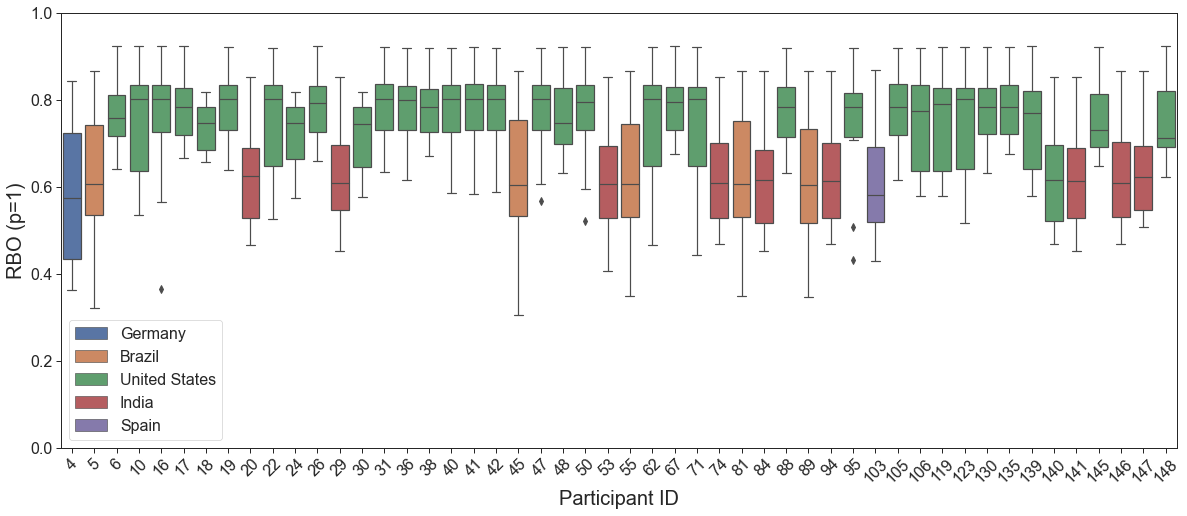

In [75]:
sns.set(rc={'figure.figsize':(20,8)})
dd1country.rename({'country':'Country'},inplace=True,axis=1)
sns.set_style("ticks")
# Smallest context:
sns.set_context("paper")
#sns.set(rc={'figure.figsize':(10,8)})
plt.yticks(fontsize=16)
#sns.boxplot(x="variable", y="value", data=dd1country,palette=country_colors)
sns.boxplot(x="variable", y="value", data=dd1country,hue=dd1country['Country'],dodge=False)
plt.xticks(rotation=45, fontsize=16)
plt.legend(fontsize=16)
#plt.title("RBO (Full URL) Box plot for each Survey (p=1)",fontsize=20)
plt.ylabel("RBO (p=1)",fontsize=20)
plt.xlabel("Participant ID",fontsize=20)
plt.ylim([0,1])
#plt.show()
plt.savefig('RBO_1_domain.pdf',bbox_inches = 'tight',
    pad_inches = 0)



In [76]:
dd1country.rename({'Country':'country'},inplace=True,axis=1)
d1country.rename({'Country':'country'},inplace=True,axis=1)


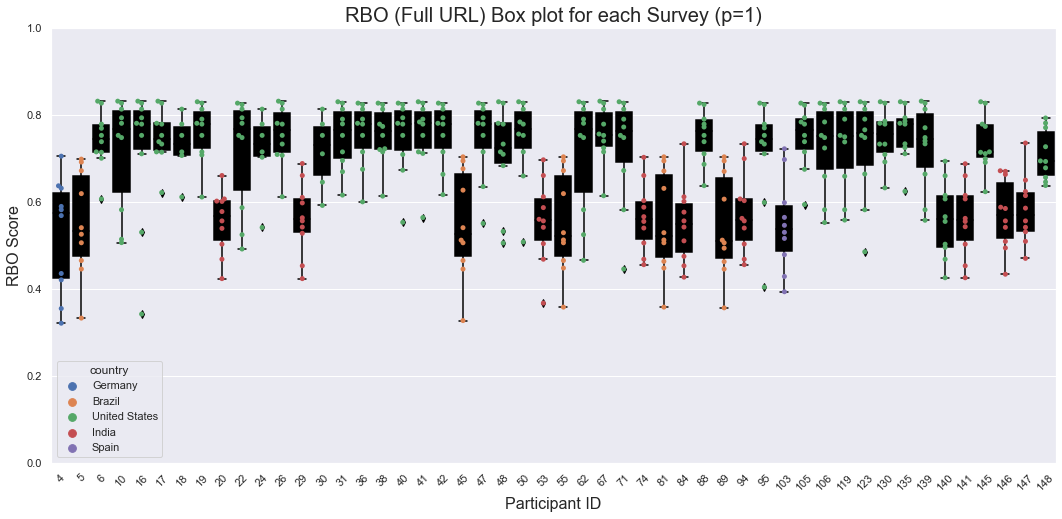

In [77]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=d1country,color='black')
sns.swarmplot(x="variable", y="value", data=d1country,hue='country')
plt.xticks(rotation=45)
plt.title("RBO (Full URL) Box plot for each Survey (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

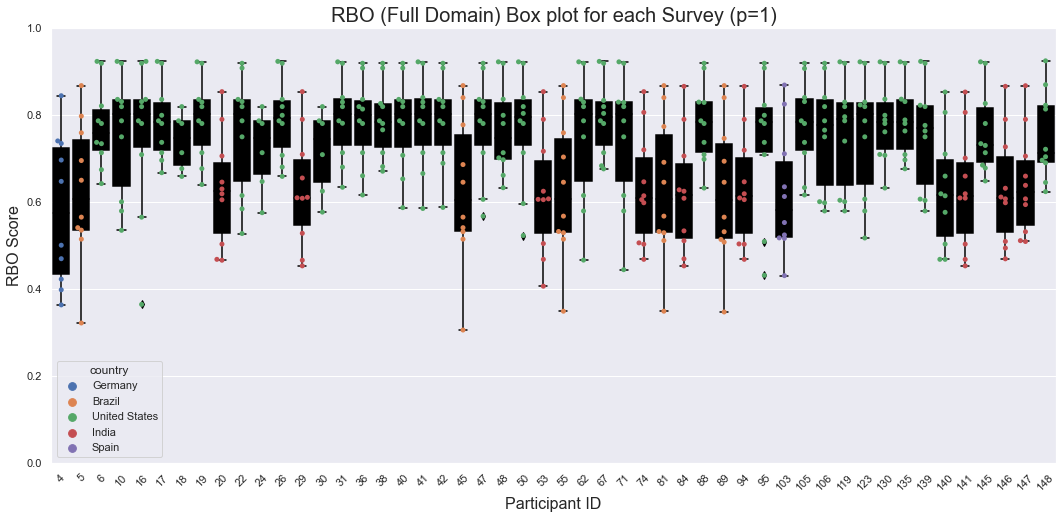

In [78]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=dd1country,color='black')
sns.swarmplot(x="variable", y="value", data=dd1country,hue='country')
plt.xticks(rotation=45)
plt.title("RBO (Full Domain) Box plot for each Survey (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

In [79]:
d2country = pd.melt(d2.T)
d2country["country"] = d2country["variable"].map(country_dict)
d2country.head()

variable     value  country
0         4  0.316545  Germany
1         4  0.266576  Germany
2         4  0.273596  Germany
3         4  0.682320  Germany
4         4  0.612938  Germany

In [80]:
dd2country = pd.melt(dd2.T)
dd2country["country"] = dd2country["variable"].map(country_dict)
dd2country.head()

variable     value  country
0         4  0.323734  Germany
1         4  0.265923  Germany
2         4  0.498953  Germany
3         4  0.680615  Germany
4         4  0.739663  Germany

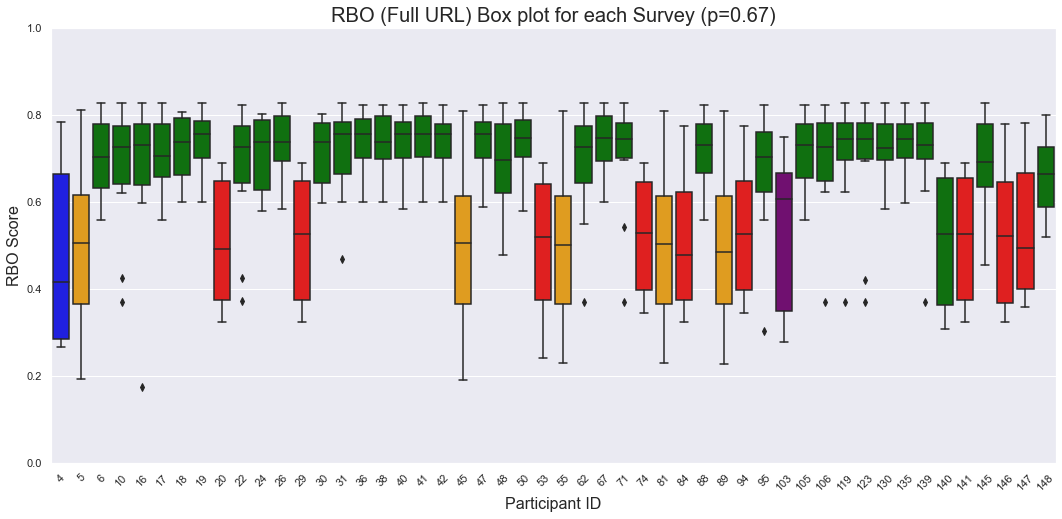

In [81]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(d2.T),palette=country_colors)
plt.xticks(rotation=45)
plt.title("RBO (Full URL) Box plot for each Survey (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

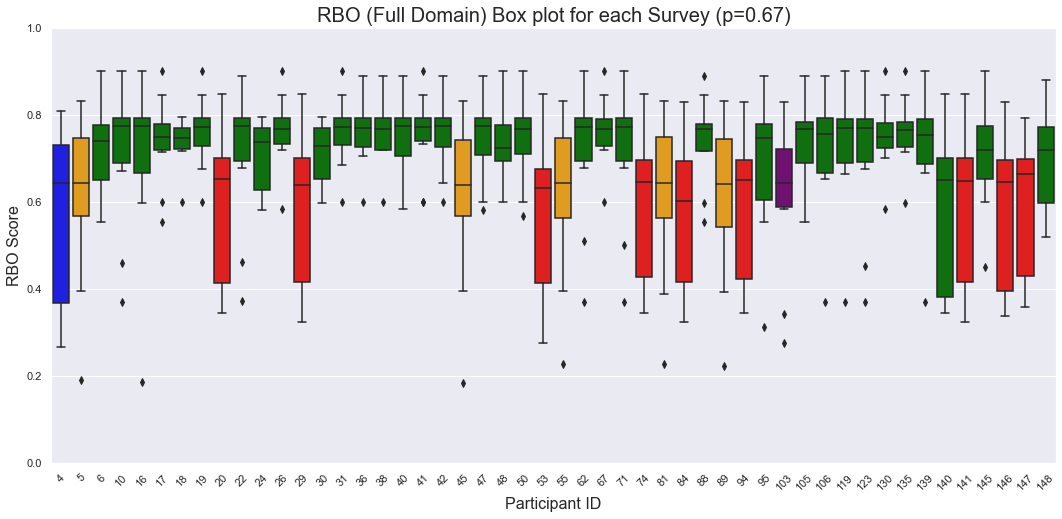

In [82]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(dd2.T),palette=country_colors)
plt.xticks(rotation=45)
plt.title("RBO (Full Domain) Box plot for each Survey (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

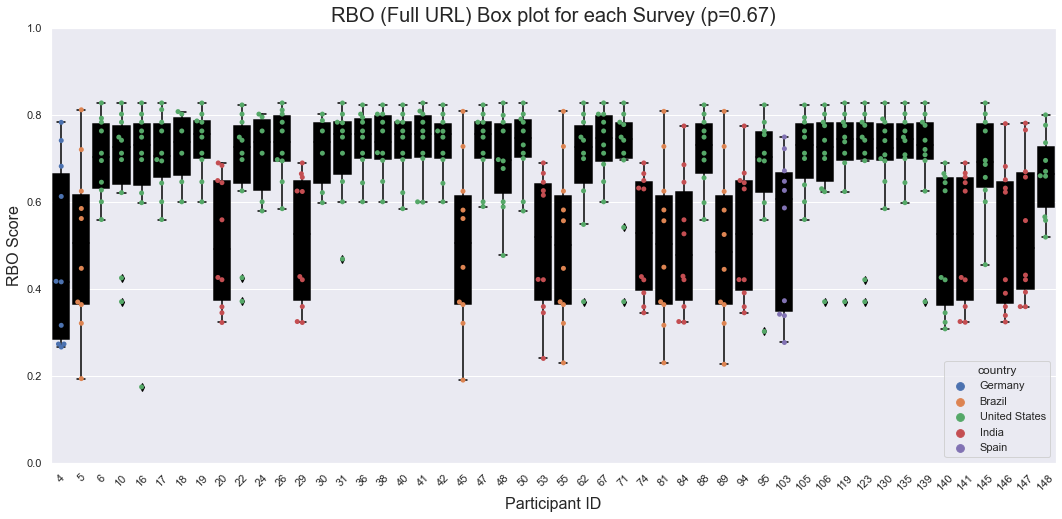

In [83]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(d2.T),color='black')
sns.swarmplot(x="variable", y="value", data=d2country,hue='country')
plt.xticks(rotation=45)
plt.title("RBO (Full URL) Box plot for each Survey (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

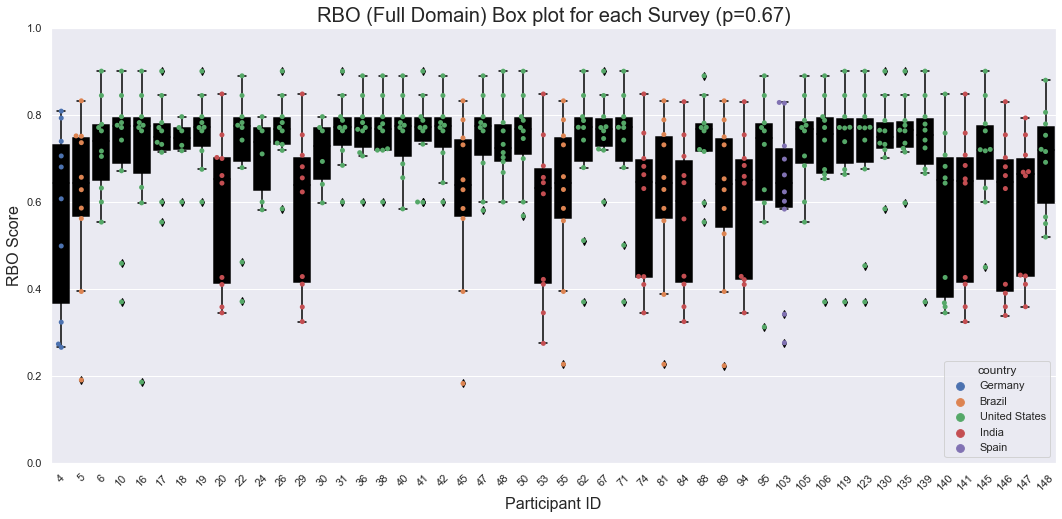

In [84]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(dd2.T),color='black')
sns.swarmplot(x="variable", y="value", data=dd2country,hue='country')
plt.xticks(rotation=45)
plt.title("RBO (Full Domain) Box plot for each Survey (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

In [85]:
d3country = pd.melt(d3.T)
d3country["country"] = d3country["variable"].map(country_dict)
d3country.head()

variable     value  country
0         4  0.034694  Germany
1         4  0.087755  Germany
2         4  0.024490  Germany
3         4  0.277098  Germany
4         4  0.078261  Germany

In [86]:
dd3country = pd.melt(dd3.T)
dd3country["country"] = dd3country["variable"].map(country_dict)
dd3country.head()

variable     value  country
0         4  0.034694  Germany
1         4  0.089626  Germany
2         4  0.097506  Germany
3         4  0.371032  Germany
4         4  0.309222  Germany

In [87]:
jaccard_url_data = pd.melt(d3.T)
jaccard_url_data.head

<bound method NDFrame.head of      variable     value
0           4  0.034694
1           4  0.087755
2           4  0.024490
3           4  0.277098
4           4  0.078261
..        ...       ...
495       148  0.463768
496       148  0.384541
497       148  0.400060
498       148  0.260544
499       148  0.281009

[500 rows x 2 columns]>

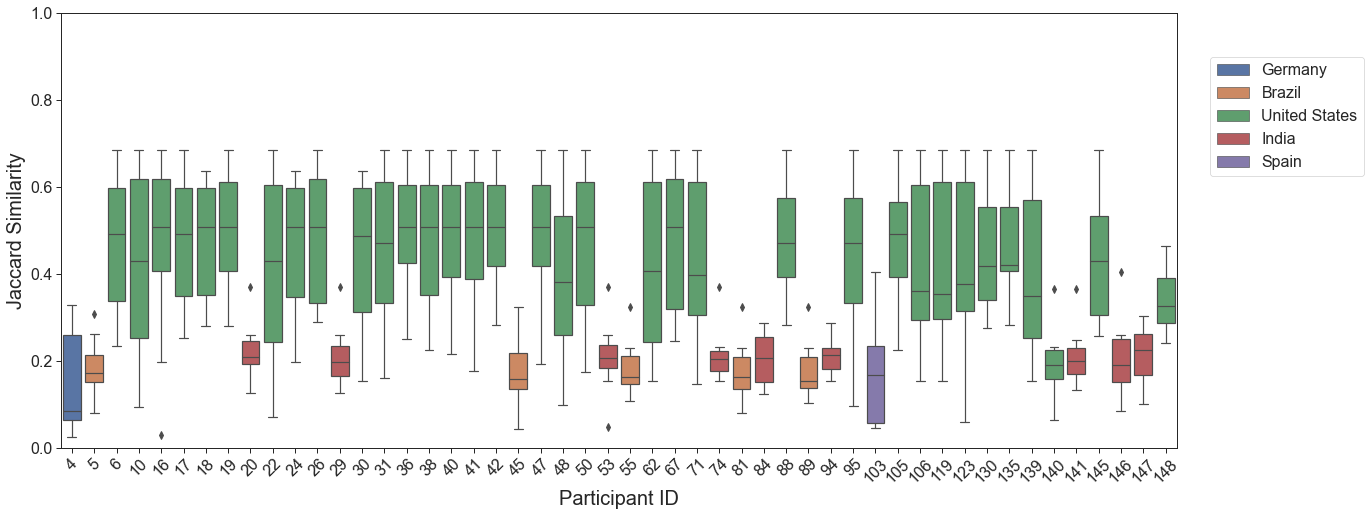

In [88]:


sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("ticks")
# Smallest context:
sns.set_context("paper")
#sns.set(rc={'figure.figsize':(10,8)})
plt.yticks(fontsize=16)
#sns.boxplot(x="variable", y="value", data=dd1country,palette=country_colors)
#sns.boxplot(x="variable", y="value", data=dd1country,hue=dd1country['Country'],dodge=False)
sns.boxplot(x="variable", y="value", data=d3country,hue=d3country['country'],dodge=False)
plt.xticks(rotation=45, fontsize=16)
#plt.legend(fontsize=16)
#plt.title("RBO (Full URL) Box plot for each Survey (p=1)",fontsize=20)
plt.ylabel("Jaccard Similarity",fontsize=20)
plt.xlabel("Participant ID",fontsize=20)
plt.ylim([0,1])
#plt.show()
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend(bbox_to_anchor=(1.03, 0.9), loc=2, borderaxespad=0., fontsize=16)

plt.savefig('Jaccard_URL.pdf',bbox_inches = 'tight',
    pad_inches = 0)

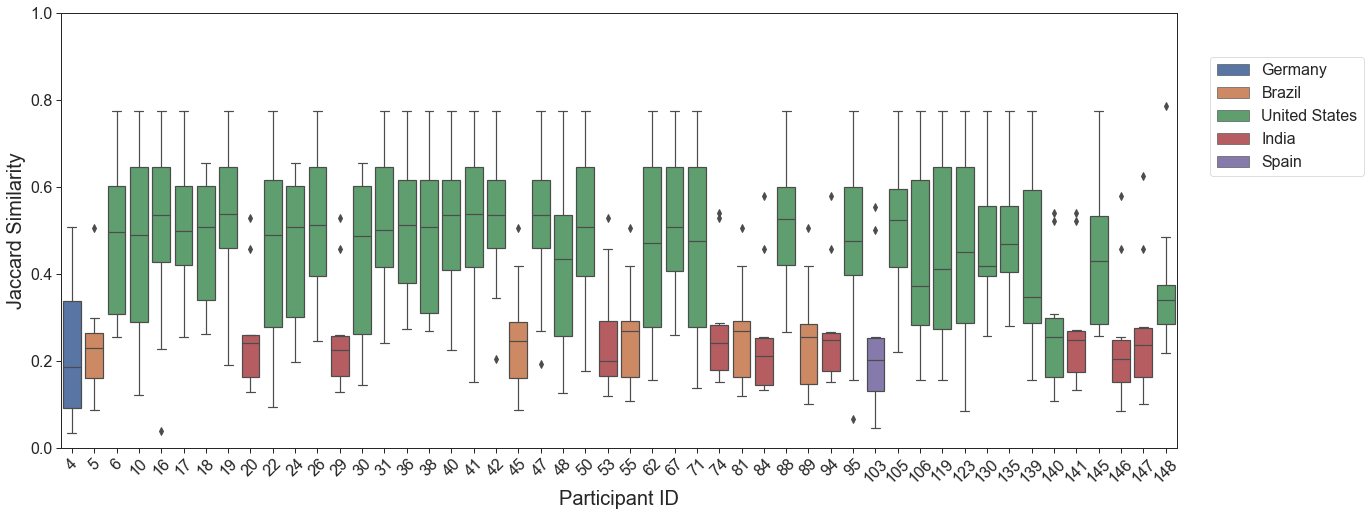

In [89]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("ticks")
# Smallest context:
sns.set_context("paper")
#sns.set(rc={'figure.figsize':(10,8)})
plt.yticks(fontsize=16)
#sns.boxplot(x="variable", y="value", data=dd1country,palette=country_colors)
#sns.boxplot(x="variable", y="value", data=dd1country,hue=dd1country['Country'],dodge=False)
sns.boxplot(x="variable", y="value", data=dd3country,hue=dd3country['country'],dodge=False)
plt.xticks(rotation=45, fontsize=16)
#plt.legend(fontsize=16)
#plt.title("RBO (Full URL) Box plot for each Survey (p=1)",fontsize=20)
plt.ylabel("Jaccard Similarity",fontsize=20)
plt.xlabel("Participant ID",fontsize=20)
plt.ylim([0,1])
#plt.show()
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend(bbox_to_anchor=(1.03, 0.9), loc=2, borderaxespad=0., fontsize=16)

plt.savefig('Jaccard_domain.pdf',bbox_inches = 'tight',
    pad_inches = 0)

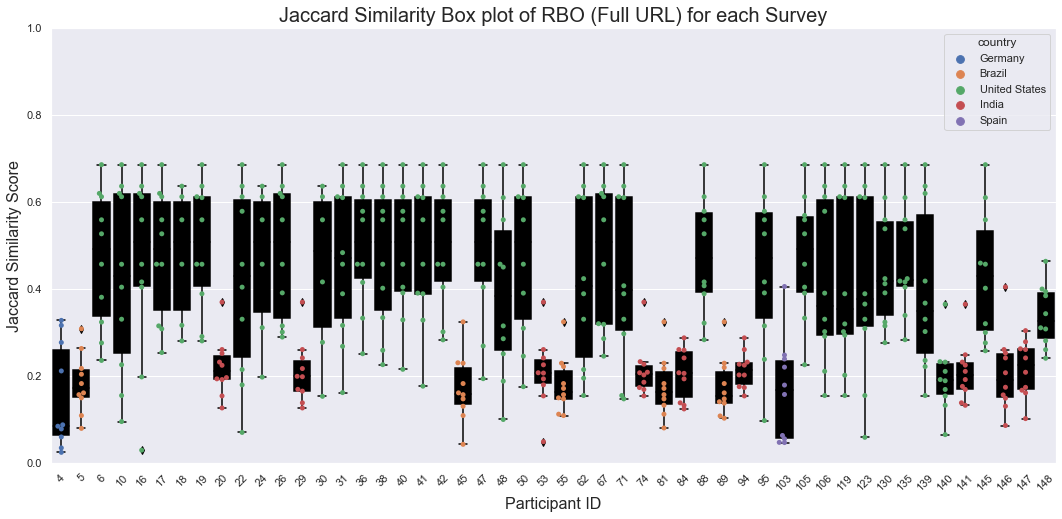

In [90]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(d3.T),color='black')
sns.swarmplot(x="variable", y="value", data=d3country,hue='country')
plt.xticks(rotation=45)
plt.title("Jaccard Similarity Box plot of RBO (Full URL) for each Survey",fontsize=20)
plt.ylabel("Jaccard Similarity Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

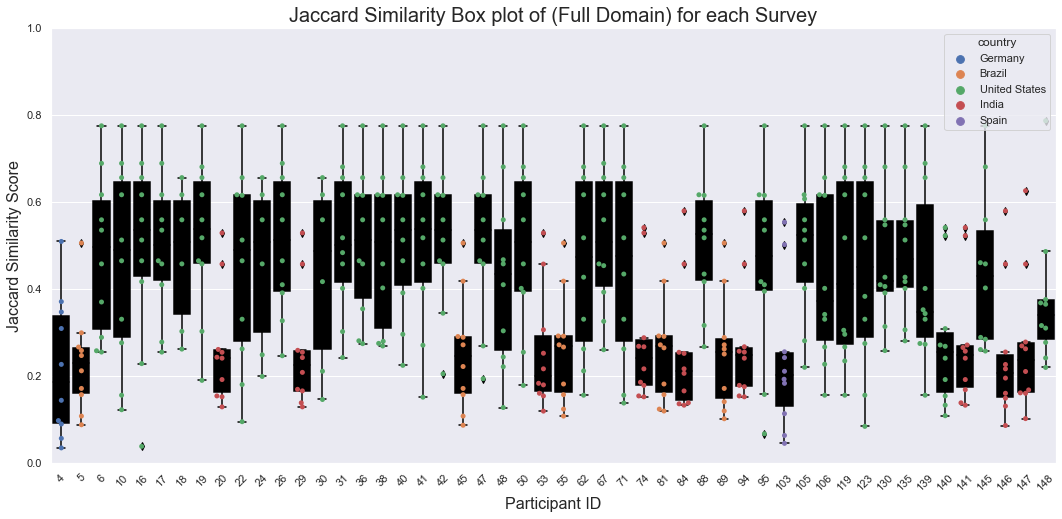

In [91]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(dd3.T),color='black')
sns.swarmplot(x="variable", y="value", data=dd3country,hue='country')
plt.xticks(rotation=45)
plt.title("Jaccard Similarity Box plot of (Full Domain) for each Survey",fontsize=20)
plt.ylabel("Jaccard Similarity Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.ylim([0,1])
plt.show()

### •	What is the difference in the *quality* of what they are getting?
### 	Proportion of .gov sites?


In [92]:
dff["gov domain"] = dff["Result Item Full Domain"].apply(lambda x: 1 if ".gov" in x else 0)
df2 = dff.groupby(["Survey Id","Keyword Id"])[["gov domain"]].agg(['count','sum'])["gov domain"]
df2["pct"] = (df2['sum'] / df2["count"])*100 
# df2

In [93]:
df3 = df2.reset_index()

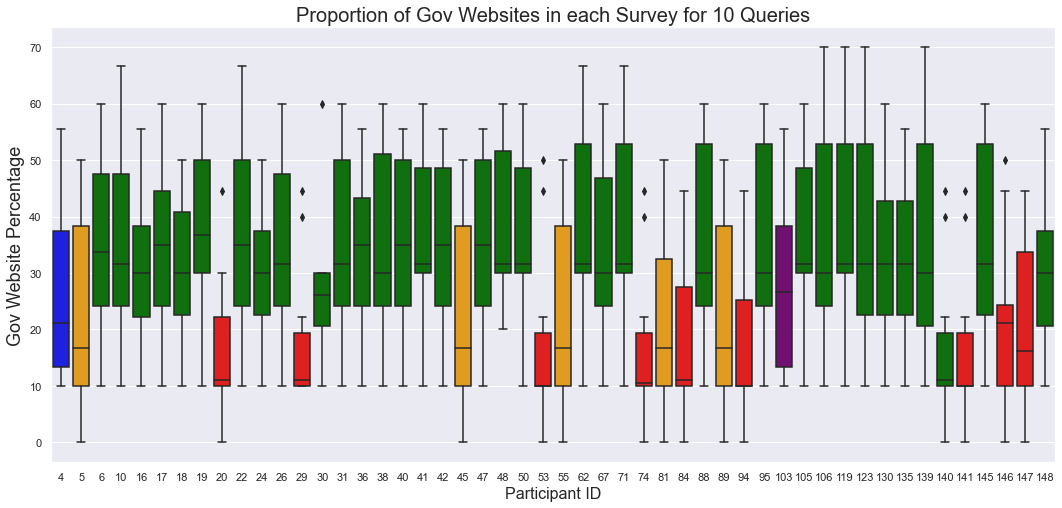

In [94]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="Survey Id",y="pct",data=df3,palette=country_colors)
plt.title("Proportion of Gov Websites in each Survey for 10 Queries",fontsize=20)
plt.ylabel("Gov Website Percentage",fontsize=18)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

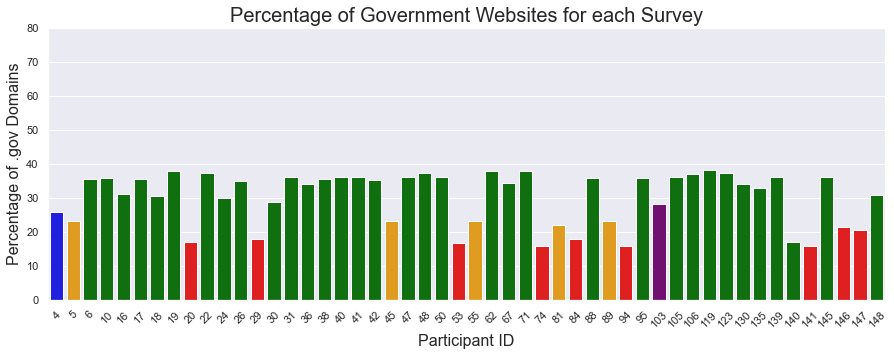

In [95]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=df2.reset_index("Keyword Id").index,y=df2['pct'],ci=None,palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,80])
plt.title("Percentage of Government Websites for each Survey",fontsize=20)
plt.ylabel("Percentage of .gov Domains",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

###  Openrank scores?

In [96]:
df3 = dff.groupby(["Survey Id",'Keyword Id'],as_index=False)[["Keyword Openrank Average"]].agg("max")
df3 = df3[["Survey Id","Keyword Openrank Average"]]

In [97]:
df3["Country"] = df3["Survey Id"].map(country_dict)

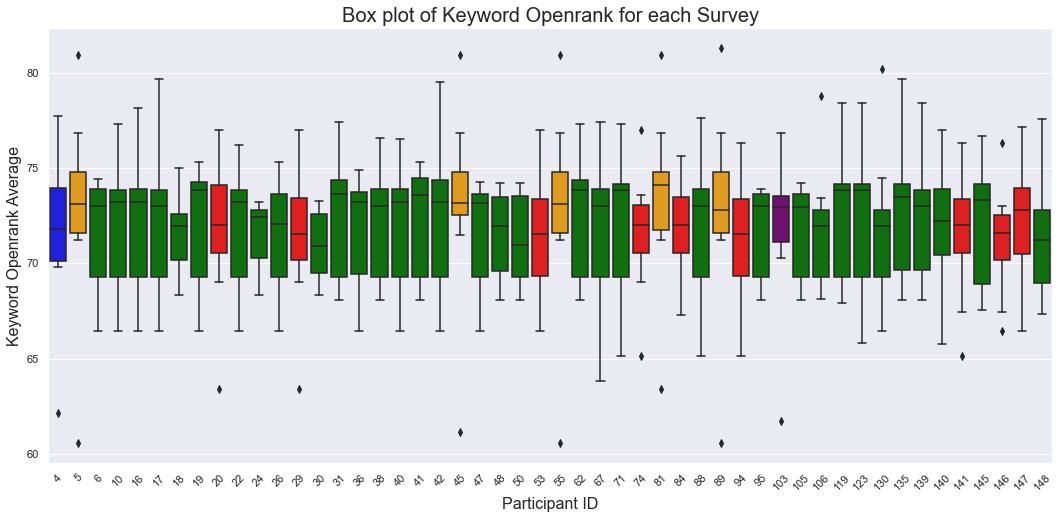

In [98]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="Survey Id", y="Keyword Openrank Average", data=df3,palette=country_colors)
plt.xticks(rotation=45)
plt.title("Box plot of Keyword Openrank for each Survey",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

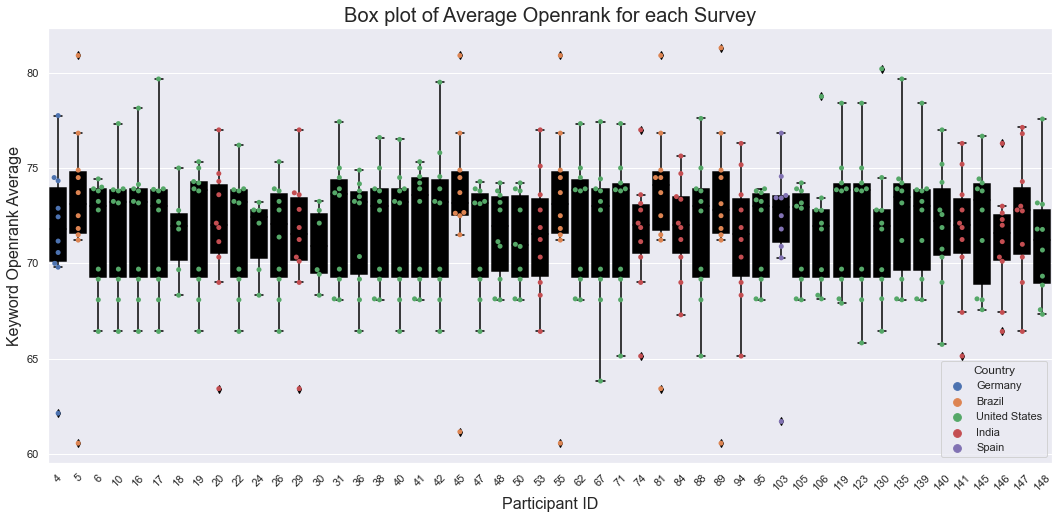

In [99]:
sns.set(rc={'figure.figsize':(18,8)})
sns.boxplot(x="Survey Id", y="Keyword Openrank Average", data=df3,color='black')
sns.swarmplot(x="Survey Id", y="Keyword Openrank Average", data=df3,hue='Country')
plt.xticks(rotation=45)
plt.title("Box plot of Average Openrank for each Survey",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

### Do results vary between positive and negative query formulations?
### •	For each pair of queries, how similar or different are the results?


In [100]:
pos = ["should i get tested for covid",
      "should i get flu shot",
      "should i get vaccinated",
      "should i wear facemask",
      "is hydroxychloroquine effective for covid"]

neg = ["should i not get tested for covid",
      "should i not get flu shot",
      "should i avoid get vaccinated",
      "should i not wear facemask",
      "is hydroxychloroquine ineffective for covid"]

dff["Pos Keyword"] = dff["Keyword Content"].apply(lambda x: "Yes" if (x in pos) else 'No')



In [101]:
p1 = ["should i get tested for covid","should i not get tested for covid"]
p2 = ["should i get flu shot","should i not get flu shot"]
p3 = ["should i get vaccinated","should i avoid get vaccinated"]
p4 = ["should i wear facemask","should i not wear facemask"]
p5 = ["is hydroxychloroquine effective for covid","is hydroxychloroquine ineffective for covid"]

dff['rbo'] = None

In [102]:
d1 = dff[dff["Keyword Content"].apply(lambda x: True if x in p1 else False)]
d2 = dff[dff["Keyword Content"].apply(lambda x: True if x in p2 else False)]
d3 = dff[dff["Keyword Content"].apply(lambda x: True if x in p3 else False)]
d4 = dff[dff["Keyword Content"].apply(lambda x: True if x in p4 else False)]
d5 = dff[dff["Keyword Content"].apply(lambda x: True if x in p5 else False)]

In [103]:

pairs_dictionary = {}
pairs_dictionary_2 = {}
pairs_dictionary_3 = {}

dpairs_dictionary = {}
dpairs_dictionary_2 = {}
dpairs_dictionary_3 = {}

for idx,dd in enumerate([d1,d2,d3,d4,d5]):
    sd = {}
    sd_2 = {}
    sd_3 = {}

    dsd = {}
    dsd_2 = {}
    dsd_3 = {}
    
    for i in dd.groupby("Survey Id"):
        sid = i[0]
        sdf = i[1]
        kids = sdf["Keyword Id"].unique()
        a1 = sdf[sdf["Keyword Id"] == kids[0]]
        a2 = sdf[sdf["Keyword Id"] == kids[1]]
    
        c1 = a1["Result Item Full Url"].to_list()
        c2 = a2["Result Item Full Url"].to_list()
        
        cc1 = a1["Result Item Full Domain"].to_list()
        cc2 = a2["Result Item Full Domain"].to_list()
        
        dc1 = []
        dc2 = []
        
        for q in cc1:
            if q not in dc1:
                dc1.append(q)
                
        for q in cc2:
            if q not in dc2:
                dc2.append(q)
        
        
        score = rbo.RankingSimilarity(c1, c2).rbo(p=1)
        
        score_2 = rbo.RankingSimilarity(c1,c2).rbo(p=0.67)
        
        v = min(len(c1),len(c2))
        score_3 = jaccard_similarity_score(c1[:v],c2[:v])
        
        dscore = rbo.RankingSimilarity(dc1, dc2).rbo(p=1)
        
        dscore_2 = rbo.RankingSimilarity(dc1,dc2).rbo(p=0.67)
        
        v = min(len(dc1),len(dc2))
        dscore_3 = jaccard_similarity_score(dc1[:v],dc2[:v])

    #     print(score)
        sd[sid] = score
        sd_2[sid] = score_2
        sd_3[sid] = score_3
        
        dsd[sid] = dscore
        dsd_2[sid] = dscore_2
        dsd_3[sid] = dscore_3
        
    pairs_dictionary["Pair {}".format(idx+1)] = sd
    pairs_dictionary_2["Pair {}".format(idx+1)] = sd_2
    pairs_dictionary_3["Pair {}".format(idx+1)] = sd_3
    
    dpairs_dictionary["Pair {}".format(idx+1)] = dsd
    dpairs_dictionary_2["Pair {}".format(idx+1)] = dsd_2
    dpairs_dictionary_3["Pair {}".format(idx+1)] = dsd_3

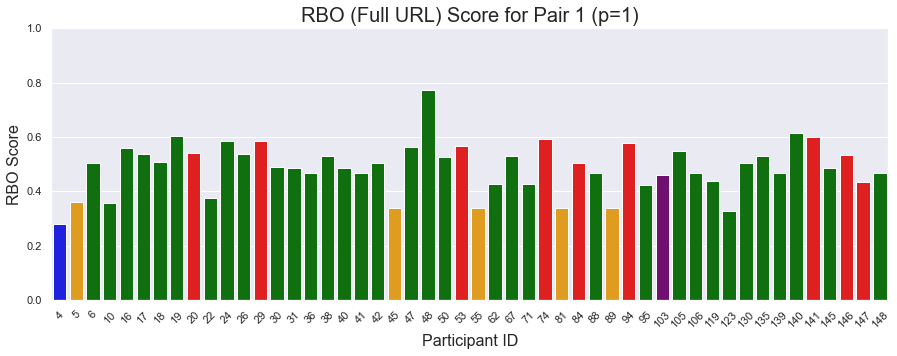

In [104]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary["Pair 1"].keys()),
            y=list(pairs_dictionary["Pair 1"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 1 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


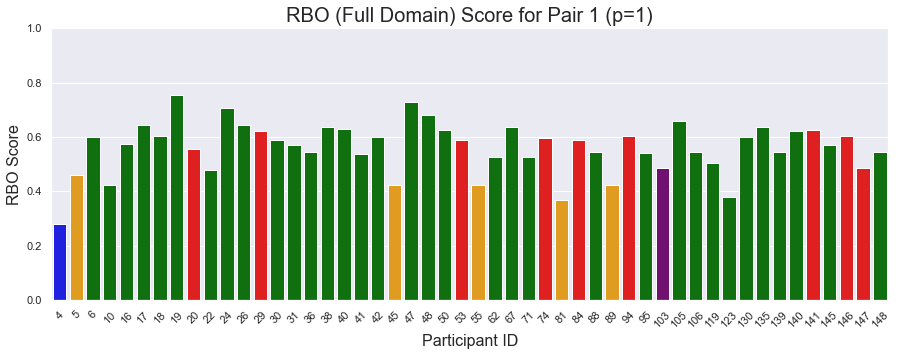

In [105]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary["Pair 1"].keys()),
            y=list(dpairs_dictionary["Pair 1"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 1 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


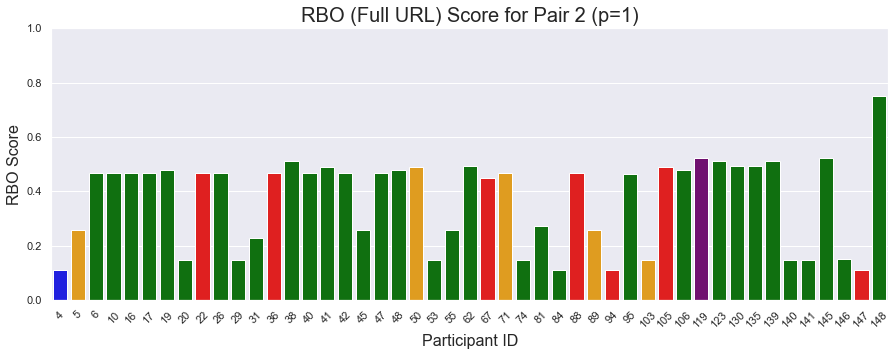

In [106]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary["Pair 2"].keys()),
            y=list(pairs_dictionary["Pair 2"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 2 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


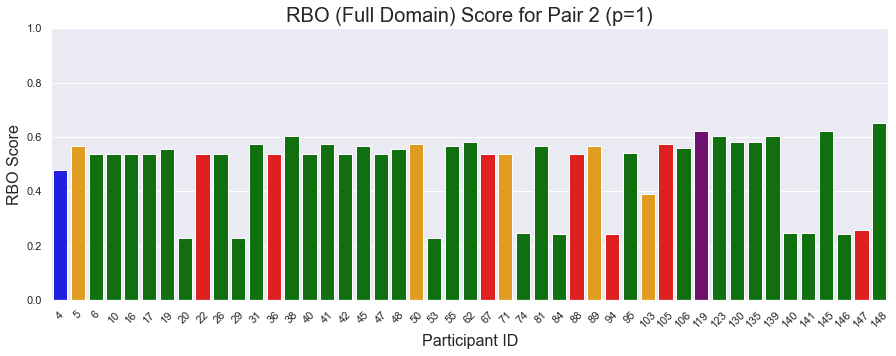

In [107]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary["Pair 2"].keys()),
            y=list(dpairs_dictionary["Pair 2"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 2 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


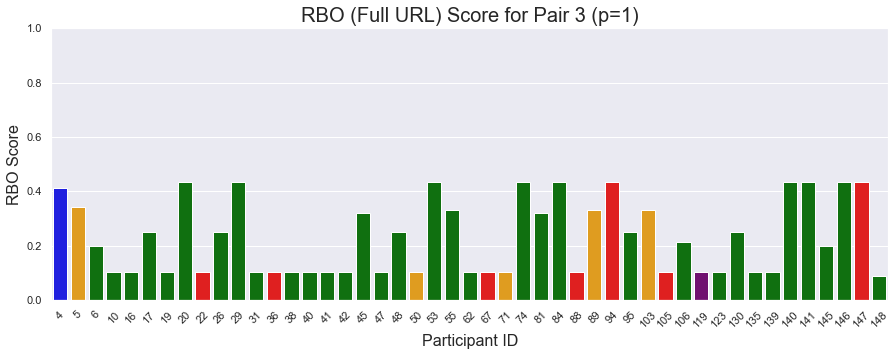

In [108]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary["Pair 3"].keys()),
            y=list(pairs_dictionary["Pair 3"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 3 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


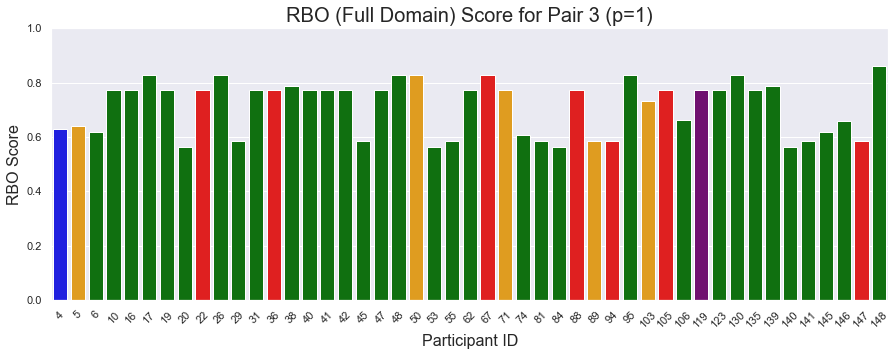

In [109]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary["Pair 3"].keys()),
            y=list(dpairs_dictionary["Pair 3"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 3 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

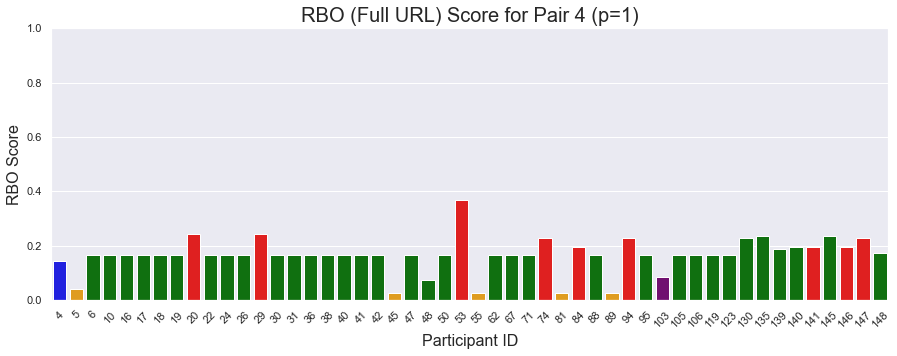

In [110]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary["Pair 4"].keys()),
            y=list(pairs_dictionary["Pair 4"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 4 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


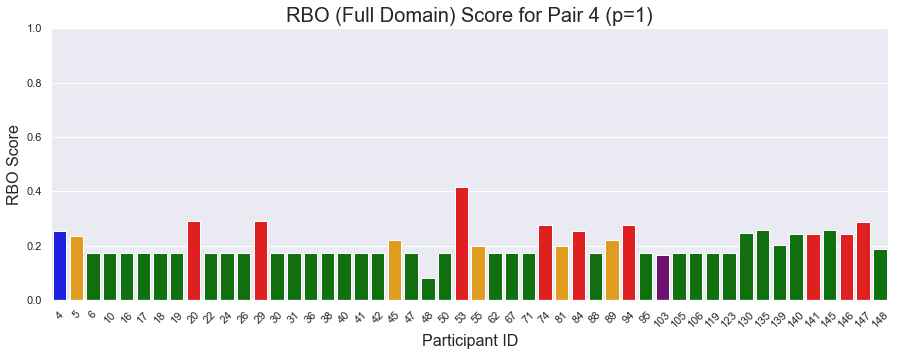

In [111]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary["Pair 4"].keys()),
            y=list(dpairs_dictionary["Pair 4"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 4 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


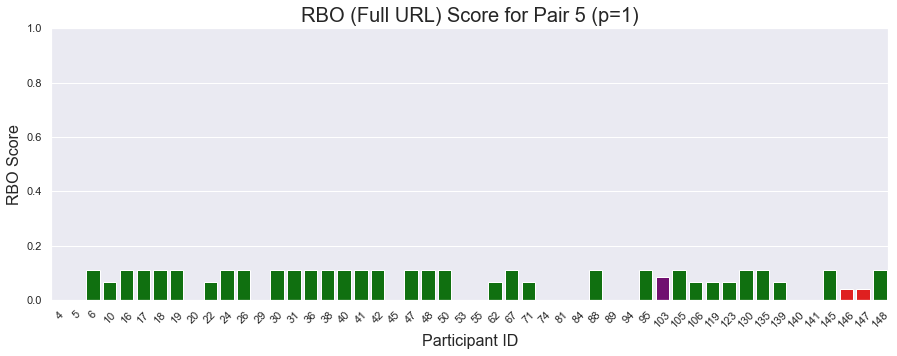

In [112]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary["Pair 5"].keys()),
            y=list(pairs_dictionary["Pair 5"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 5 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


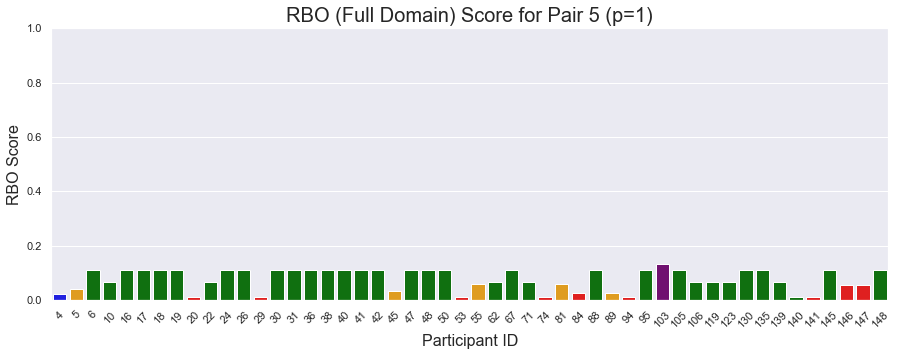

In [113]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary["Pair 5"].keys()),
            y=list(dpairs_dictionary["Pair 5"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 5 (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()


### Showing the charts for Top Results RBO Scores

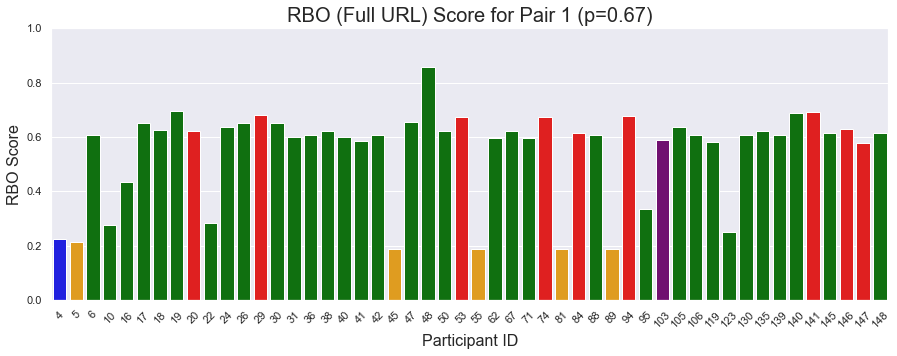

In [114]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary_2["Pair 1"].keys()),
            y=list(pairs_dictionary_2["Pair 1"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 1 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

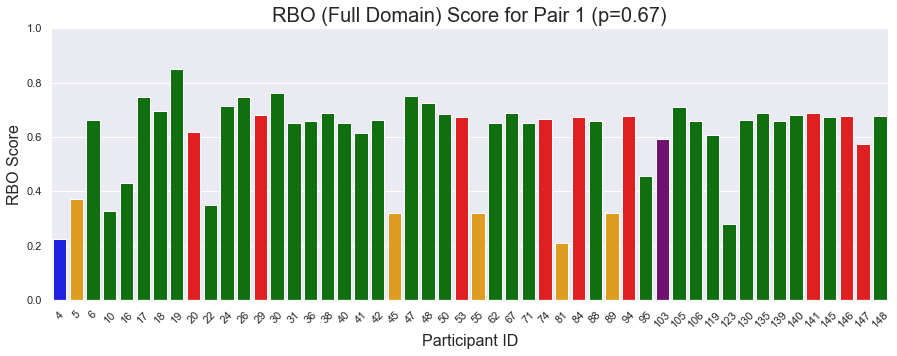

In [115]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary_2["Pair 1"].keys()),
            y=list(dpairs_dictionary_2["Pair 1"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 1 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

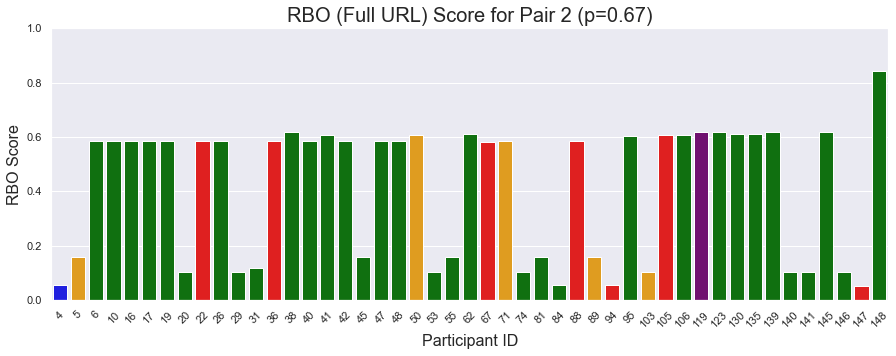

In [116]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary_2["Pair 2"].keys()),
            y=list(pairs_dictionary_2["Pair 2"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 2 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

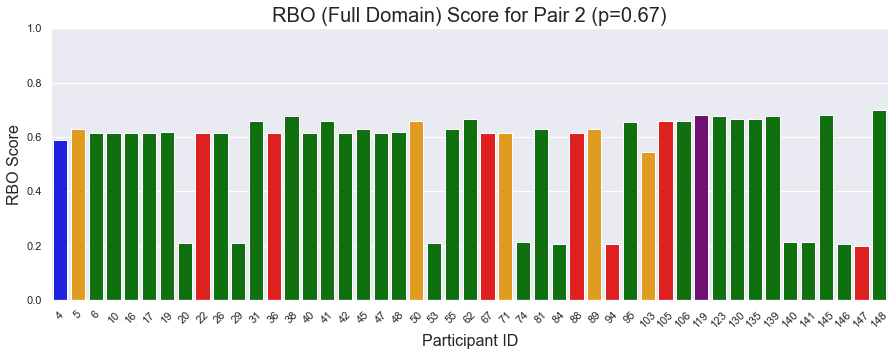

In [117]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary_2["Pair 2"].keys()),
            y=list(dpairs_dictionary_2["Pair 2"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 2 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

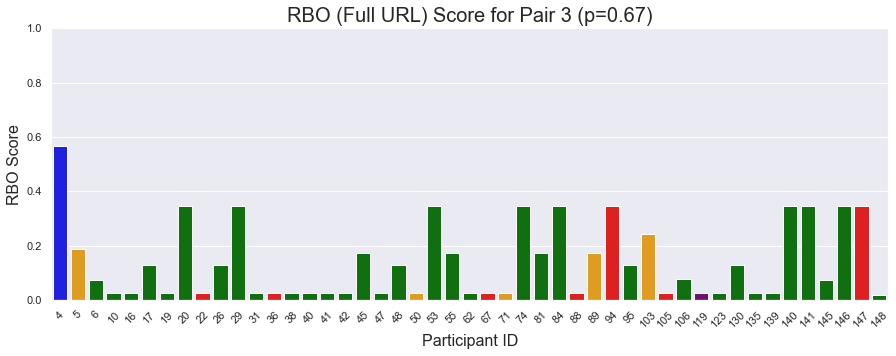

In [118]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary_2["Pair 3"].keys()),
            y=list(pairs_dictionary_2["Pair 3"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 3 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

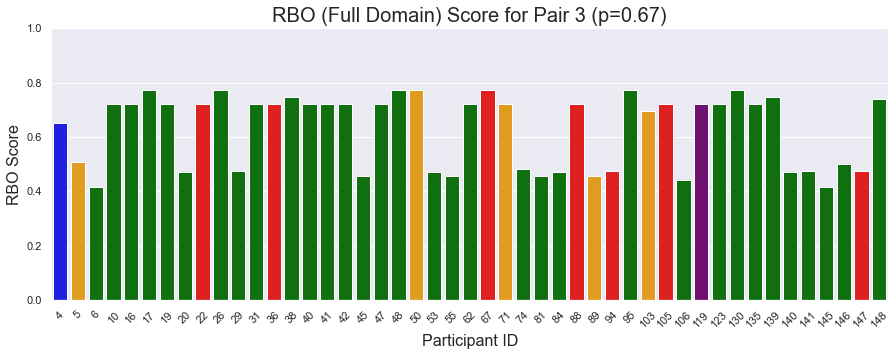

In [119]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary_2["Pair 3"].keys()),
            y=list(dpairs_dictionary_2["Pair 3"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 3 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

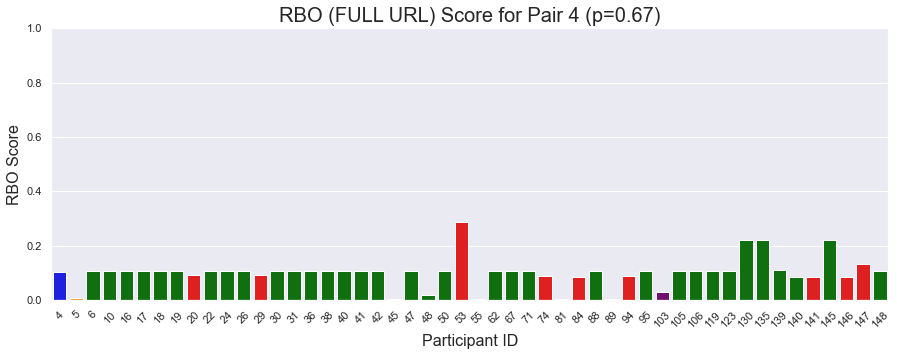

In [120]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary_2["Pair 4"].keys()),
            y=list(pairs_dictionary_2["Pair 4"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (FULL URL) Score for Pair 4 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

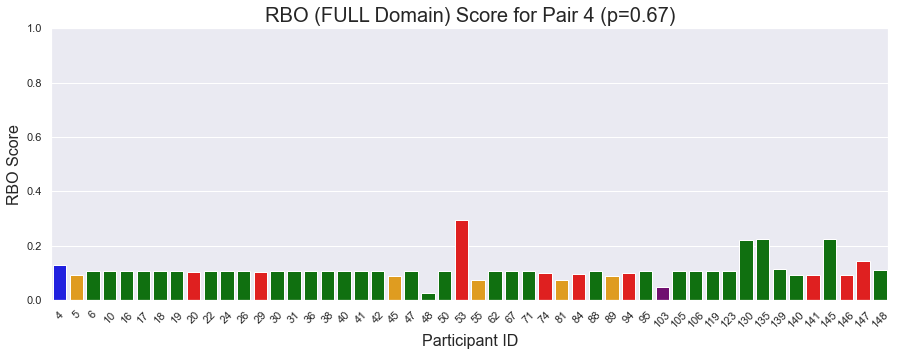

In [121]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary_2["Pair 4"].keys()),
            y=list(dpairs_dictionary_2["Pair 4"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (FULL Domain) Score for Pair 4 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

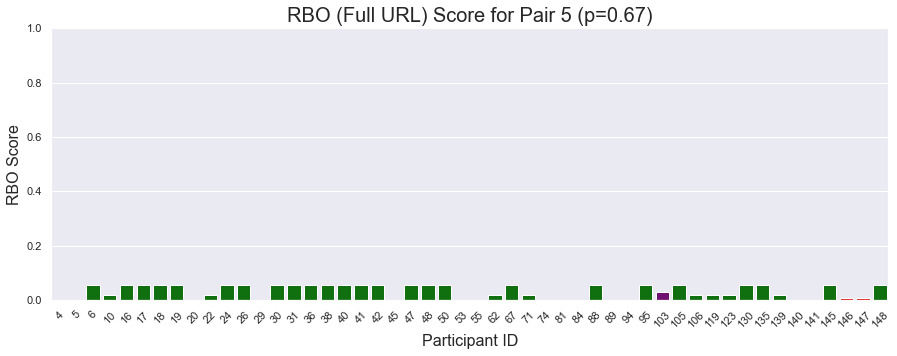

In [122]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(pairs_dictionary_2["Pair 5"].keys()),
            y=list(pairs_dictionary_2["Pair 5"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full URL) Score for Pair 5 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

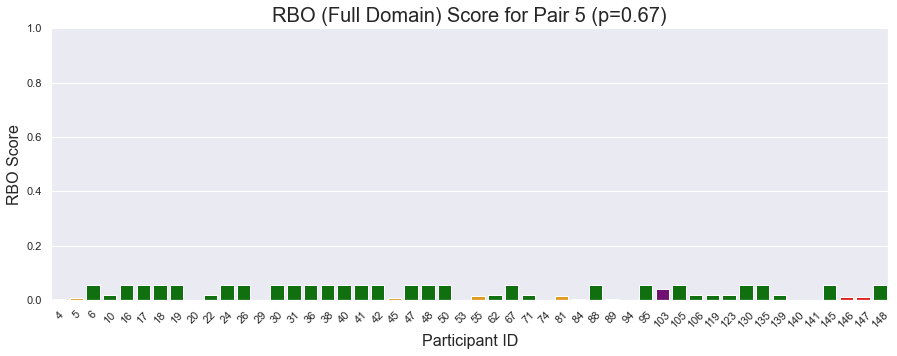

In [123]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=list(dpairs_dictionary_2["Pair 5"].keys()),
            y=list(dpairs_dictionary_2["Pair 5"].values()),palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.title("RBO (Full Domain) Score for Pair 5 (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [124]:
d3 = pd.DataFrame(pairs_dictionary)
d3.head()

Pair 1    Pair 2    Pair 3    Pair 4    Pair 5
4   0.278730  0.110626  0.413536  0.142897  0.000000
5   0.362024  0.258289  0.341138  0.042108  0.000000
6   0.504613  0.465520  0.197487  0.164008  0.109563
10  0.355952  0.465520  0.102734  0.164008  0.064563
16  0.559171  0.465520  0.102734  0.164008  0.109563

In [125]:
dd3 = pd.DataFrame(dpairs_dictionary)
dd3.head()

Pair 1    Pair 2    Pair 3    Pair 4    Pair 5
4   0.280379  0.478912  0.627778  0.255357  0.021111
5   0.461508  0.566667  0.641667  0.235582  0.042108
6   0.599320  0.538095  0.619444  0.173898  0.109563
10  0.421280  0.538095  0.772222  0.173898  0.064563
16  0.573512  0.538095  0.772222  0.173898  0.109563

In [126]:
d3 = pd.melt(d3.reset_index(),id_vars=["index"])
dd3 = pd.melt(dd3.reset_index(),id_vars=["index"])

In [127]:
d3["Country"] = d3["index"].map(country_dict)
d3.tail()

index variable     value        Country
245    141   Pair 5  0.000000          India
246    145   Pair 5  0.109563  United States
247    146   Pair 5  0.042108          India
248    147   Pair 5  0.042108          India
249    148   Pair 5  0.109563  United States

In [128]:
dd3["Country"] = dd3["index"].map(country_dict)
dd3.tail()

index variable     value        Country
245    141   Pair 5  0.012346          India
246    145   Pair 5  0.109563  United States
247    146   Pair 5  0.054453          India
248    147   Pair 5  0.054453          India
249    148   Pair 5  0.109563  United States

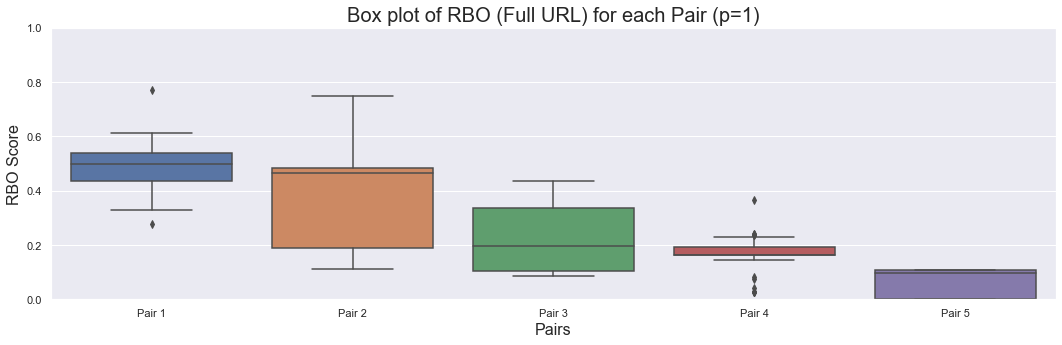

In [129]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=d3)
plt.title("Box plot of RBO (Full URL) for each Pair (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

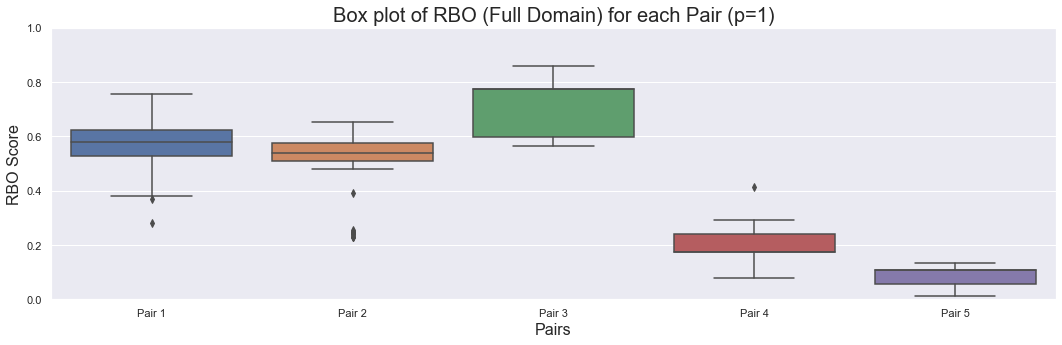

In [130]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=dd3)
plt.title("Box plot of RBO (Full Domain) for each Pair (p=1)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

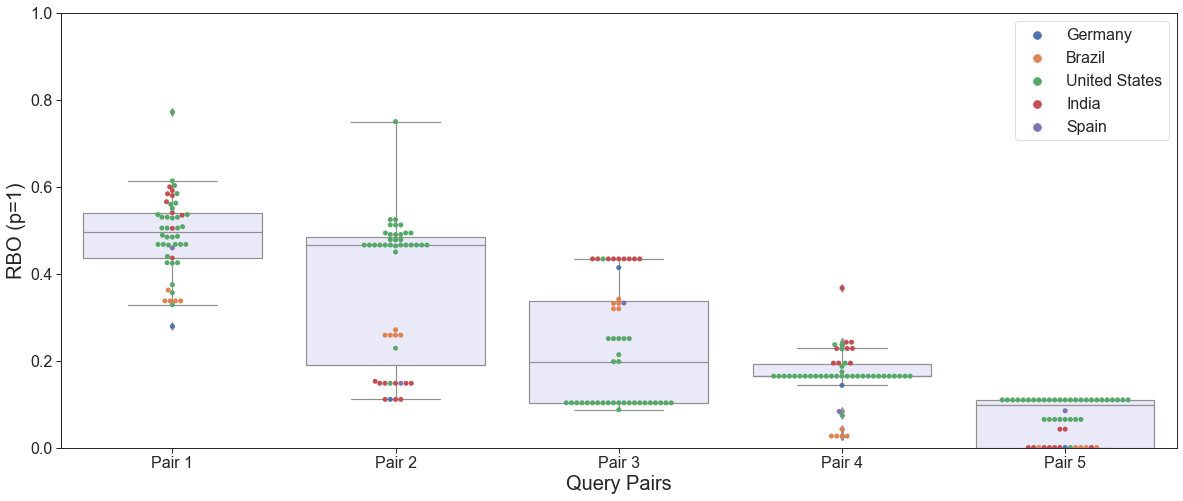

In [142]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("ticks")
sns.set_context("paper")
plt.yticks(fontsize=16)
sns.boxplot(x="variable", y="value", data=d3, color="lavender")
sns.swarmplot(x="variable", y="value", data=d3,hue="Country")
#plt.title("Box plot of RBO (Full URL) for each Pair (p=1)",fontsize=20)
plt.ylabel("RBO (p=1)",fontsize=20)
plt.xlabel("Query Pairs",fontsize=20)
plt.xticks(fontsize=16)
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.savefig('query_pairs_RBO_1_URL.pdf',bbox_inches = 'tight',
    pad_inches = 0)

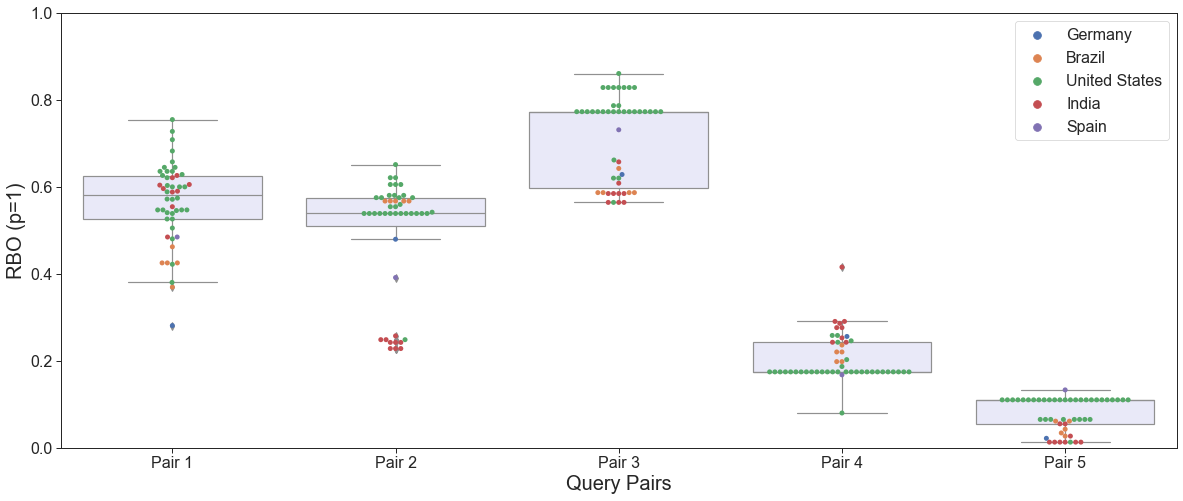

In [143]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("ticks")
sns.set_context("paper")
plt.yticks(fontsize=16)
sns.boxplot(x="variable", y="value", data=dd3,color="lavender")
sns.swarmplot(x="variable", y="value", data=dd3,hue="Country")
#plt.title("Box plot of RBO (Full URL) for each Pair (p=1)",fontsize=20)
plt.ylabel("RBO (p=1)",fontsize=20)
plt.xlabel("Query Pairs",fontsize=20)
plt.xticks(fontsize=16)
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.savefig('query_pairs_RBO_1_domain.pdf',bbox_inches = 'tight',
    pad_inches = 0)

In [24]:
d4 = pd.DataFrame(pairs_dictionary_2)
d4.head()

Pair 1    Pair 2    Pair 3    Pair 4    Pair 5
4   0.225177  0.053792  0.564878  0.104069  0.000000
5   0.213448  0.156963  0.185941  0.008253  0.000000
6   0.608725  0.584942  0.073460  0.106455  0.054690
10  0.275766  0.584942  0.023933  0.106455  0.016577
16  0.435742  0.584942  0.023933  0.106455  0.054690

In [25]:
dd4 = pd.DataFrame(dpairs_dictionary_2)
dd4.head()

Pair 1    Pair 2    Pair 3    Pair 4    Pair 5
4   0.224677  0.589535  0.651110  0.129797  0.002387
5   0.370683  0.630385  0.505852  0.091024  0.008253
6   0.663904  0.615489  0.416028  0.107160  0.054690
10  0.328104  0.615489  0.721462  0.107160  0.016577
16  0.429786  0.615489  0.721462  0.107160  0.054690

In [26]:
d4 = pd.melt(d4.reset_index(),id_vars=["index"])
dd4 = pd.melt(dd4.reset_index(),id_vars=["index"])

In [27]:
d4["Country"] = d4["index"].map(country_dict)
d4.head()

NameError: name 'country_dict' is not defined

In [163]:
dd4["Country"] = dd4["index"].map(country_dict)
dd4.head()

index variable     value        Country
0      4   Pair 1  0.224677        Germany
1      5   Pair 1  0.370683         Brazil
2      6   Pair 1  0.663904  United States
3     10   Pair 1  0.328104  United States
4     16   Pair 1  0.429786  United States

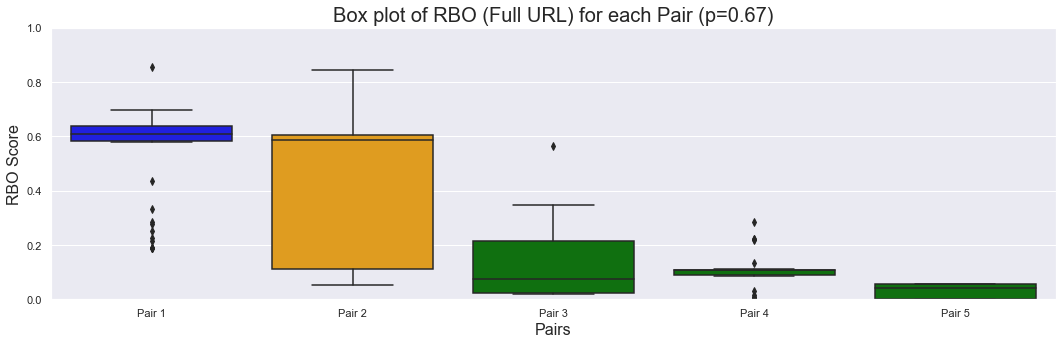

In [164]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=d4,palette=country_colors)
plt.title("Box plot of RBO (Full URL) for each Pair (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=dd4,palette=country_colors)
plt.title("Box plot of RBO (Full Domain) for each Pair (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=d4,color='black')
sns.swarmplot(x="variable", y="value", data=d4,hue='Country')
plt.title("Box plot of RBO (Full URL) for each Pair (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=dd4,color='black')
sns.swarmplot(x="variable", y="value", data=dd4,hue='Country')
plt.title("Box plot of RBO (Full Domain) for each Pair (p=0.67)",fontsize=20)
plt.ylabel("RBO Score",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

In [ ]:
d5 = pd.DataFrame(pairs_dictionary_3)
d5.head()

In [ ]:
dd5 = pd.DataFrame(dpairs_dictionary_3)
dd5.head()

In [ ]:
d5 = pd.melt(d5.reset_index(),id_vars=["index"])
d5["Country"] = d5["index"].map(country_dict)
d5.head()

In [ ]:
dd5 = pd.melt(dd5.reset_index(),id_vars=["index"])
dd5["Country"] = dd5["index"].map(country_dict)
dd5.head()

In [28]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=d5)
plt.title("Box plot of RBO (Full URL) Jaccard Similarity for each Pair",fontsize=20)
plt.ylabel("Jaccard Similarity",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

ValueError: Could not interpret input 'variable'

In [129]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=dd5)
plt.title("Box plot of RBO (Full Domain) Jaccard Similarity for each Pair",fontsize=20)
plt.ylabel("Jaccard Similarity",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

NameError: name 'dd5' is not defined

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=d5,color='black')
sns.swarmplot(x="variable", y="value", data=d5,hue='Country')
plt.title("Box plot of RBO (Full URL) for each Pair Jaccard Similarity",fontsize=20)
plt.ylabel("Jaccard Similarity",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x="variable", y="value", data=dd5,color='black')
sns.swarmplot(x="variable", y="value", data=dd5,hue='Country')
plt.title("Box plot of RBO (Full URL) for each Pair Jaccard Similarity",fontsize=20)
plt.ylabel("Jaccard Similarity",fontsize=16)
plt.xlabel("Pairs",fontsize=16)
plt.ylim([0,1])
plt.show()

### What is the difference in the *quality* of what they are getting?
### o	Proportion of .gov sites?


In [33]:
def get_pairs(x):
    if x in p1:
        return "p1"
    elif x in p2:
        return "p2"
    elif x in p3:
        return "p3"
    elif x in p4:
        return "p4"
    elif x in p5:
        return "p5"
        

In [29]:
tmp = [x for x in dff["Result Item Full Domain"] if  ".gov" in x]
tmp

['fda.gov',
 'ncbi.nlm.nih.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'scdhec.gov',
 'health.gov.au',
 'cdc.gov',
 'health.gov.au',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'vaccines.gov',
 'vaccines.gov',
 'cdc.gov',
 'ncbi.nlm.nih.gov',
 'vaccines.gov',
 'vaccines.gov',
 'cdc.gov',
 'health.gov.au',
 'health.qld.gov.au',
 'cdc.gov',
 'cdc.gov',
 'nih.gov',
 'ncbi.nlm.nih.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'vaccines.gov',
 'cdc.gov',
 'cdc.gov',
 'ncbi.nlm.nih.gov',
 'vaccines.gov',
 'health.gov.au',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'scdhec.gov',
 'health.gov.au',
 'mn.gov',
 'fda.gov',
 'cdc.gov',
 'ncbi.nlm.nih.gov',
 'fda.gov',
 'nih.gov',
 'cdc.gov',
 'cdc.gov',
 'healthvermont.gov',
 'cdc.gov',
 'cdc.gov',
 'faq.coronavirus.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'vaccines.gov',
 'vaccines.gov',
 'health.ny.gov',
 'cdc.gov',
 'cdc.gov',
 'cdc.gov',
 'vaccines.gov',
 'vaccines.gov',
 'cd

In [30]:
dff["gov domain"] = dff["Result Item Full Domain"].apply(lambda x: 1 if ".gov" in x else 0)

In [31]:
govdf = dff[["Survey Id","Keyword Content","gov domain"]]

In [34]:
govdf["Pair Number"] = govdf["Keyword Content"].apply(get_pairs)

In [35]:
govdf["Keyword Type"] = govdf["Keyword Content"].apply(lambda x: "pos" if (x in pos) else 'neg')

In [36]:
govdf = govdf.groupby(["Survey Id","Keyword Content","Pair Number","Keyword Type"],as_index=False)[["gov domain"]].agg(['count','sum'])

In [37]:
govdf.reset_index(inplace=True)

In [38]:
govdf["Proportion"] = govdf["gov domain"]["sum"] / govdf["gov domain"]['count'] 

In [39]:
govdf = govdf.drop("gov domain",axis=1)

In [40]:
govdf

Survey Id                              Keyword Content Pair Number  \
                                                                         
0           4    is hydroxychloroquine effective for covid          p5   
1           4  is hydroxychloroquine ineffective for covid          p5   
2           4                should i avoid get vaccinated          p3   
3           4                        should i get flu shot          p2   
4           4                should i get tested for covid          p1   
..        ...                                          ...         ...   
483       148                      should i get vaccinated          p3   
484       148                    should i not get flu shot          p2   
485       148            should i not get tested for covid          p1   
486       148                   should i not wear facemask          p4   
487       148                       should i wear facemask          p4   

    Keyword Type Proportion  
                             
0            pos   0.200000  
1            neg   0.100000  
2            neg   0.400000  
3            pos   0.222222  
4            pos   0.400000  
..           ...        ...  
483          pos   0.555556  
484          neg   0.300000  
485          neg   0.400000  
486          neg   0.300000  
487          pos   0.100000  

[488 rows x 5 columns]

In [41]:
govdf_2 = govdf[["Pair Number","Keyword Type","Proportion"]].set_index("Pair Number").sort_index().reset_index()

In [42]:
govdf_2.rename({'Keyword Type':'Query'},inplace=True,axis=1)
govdf_2['Query'] = govdf_2['Query'].replace({'pos':'without negation', 'neg':'with negation'})
govdf_2['Pair Number'] = govdf_2['Pair Number'].replace({'p1':'Pair 1', 
'p2':'Pair 2', 'p3':'Pair 3', 'p4':'Pair 4', 'p5':'Pair 5'})


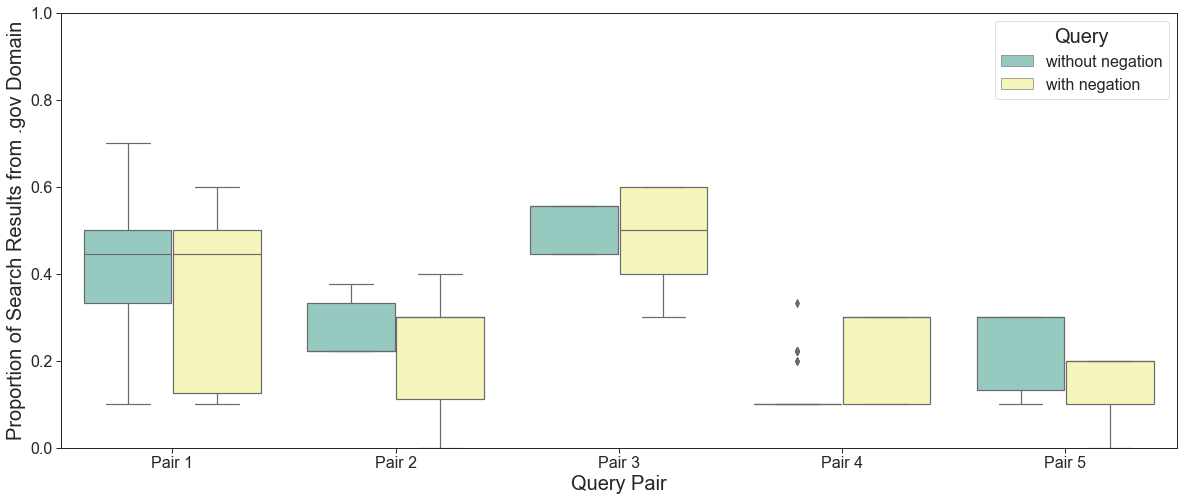

In [43]:
sns.set(rc={'figure.figsize':(20,8)})

sns.set_context("paper")
sns.set_style("ticks")
sns.boxplot(x="Pair Number",y="Proportion",hue="Query",data=govdf_2,palette="Set3")
#plt.title("Proportion of Gov Domain in Positive and Negative for each Pair",fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.ylabel("Proportion of Search Results from .gov Domain",fontsize=20)
plt.xlabel("Query Pair",fontsize=20)
plt.ylim([0,1])
plt.legend(title="Query",fontsize=16, title_fontsize=20)

plt.savefig('query_pairs_gov_domain.pdf',bbox_inches = 'tight',
    pad_inches = 0)


In [ ]:
pro = {}
pairs = [p1,p2,p3,p4,p5]

for i in govdf.groupby("Survey Id"):
    d = i[1]
    scores = {}
    for idx,p in enumerate(pairs):
        try:
            pv = d.loc[d["Keyword Content"] == p[0],"Proportion"].values[0]
            nv = d.loc[d["Keyword Content"] == p[1],"Proportion"].values[0]
            diff = pv - nv 
            scores["Pair {}".format(idx+1)] = diff
        except Exception as e:
#             print(e)
            pass
    pro[i[0]] = scores
    

In [ ]:
prodf = pd.DataFrame(data=pro).T
prodf.head()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=prodf.index,y=prodf["Pair 1"],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([-0.5,0.5])
plt.title("Proportion of Gov Websites for Pair 1 for Each Participant",fontsize=20)
plt.ylabel("Gov Proportion",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=prodf.index,y=prodf["Pair 2"],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([-0.5,0.5])
plt.title("Proportion of Gov Websites for Pair 2 for Each Participant",fontsize=20)
plt.ylabel("Gov Proportion",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=prodf.index,y=prodf["Pair 3"],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([-0.5,0.5])
plt.title("Proportion of Gov Websites for Pair 3 for Each Participant",fontsize=20)
plt.ylabel("Gov Proportion",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=prodf.index,y=prodf["Pair 4"],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([-0.5,0.5])
plt.title("Proportion of Gov Websites for Pair 4 for Each Participant",fontsize=20)
plt.ylabel("Gov Proportion",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=prodf.index,y=prodf["Pair 5"],palette=country_colors)
plt.xticks(rotation=45)
plt.ylim([-0.5,0.5])
plt.title("Proportion of Gov Websites for Pair 5 for Each Participant",fontsize=20)
plt.ylabel("Gov Proportion",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
rankdf = dff.groupby(["Survey Id","Keyword Content"],as_index=False)[["Keyword Openrank Average"]].agg("mean")

def get_pair_number(x):
    for idx,p in enumerate(pairs):
        if x in p:
            return idx + 1
        

rankdf["Pair Number"] = rankdf["Keyword Content"].apply(get_pair_number)
rankdf = rankdf.groupby(["Survey Id","Pair Number"],as_index=False)[["Keyword Openrank Average"]].agg("mean")
rankdf = rankdf.set_index("Survey Id")
# rankdf

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
d = rankdf[rankdf["Pair Number"] == 1][["Keyword Openrank Average"]]
sns.barplot(x=d.index,y=d["Keyword Openrank Average"],palette=country_colors)
plt.xticks(rotation=45)
plt.title("Average Openrank for Pair 1",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
d = rankdf[rankdf["Pair Number"] == 2][["Keyword Openrank Average"]]
sns.barplot(x=d.index,y=d["Keyword Openrank Average"],palette=country_colors)
plt.xticks(rotation=45)
plt.title("Average Openrank for Pair 2",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
d = rankdf[rankdf["Pair Number"] == 3][["Keyword Openrank Average"]]
sns.barplot(x=d.index,y=d["Keyword Openrank Average"],palette=country_colors)
plt.xticks(rotation=45)
plt.title("Average Openrank for Pair 3",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
d = rankdf[rankdf["Pair Number"] == 4][["Keyword Openrank Average"]]
sns.barplot(x=d.index,y=d["Keyword Openrank Average"],palette=country_colors)
plt.xticks(rotation=45)
plt.title("Average Openrank for Pair 4",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

In [2]:
sns.set(rc={'figure.figsize':(15,5)})
d = rankdf[rankdf["Pair Number"] == 5][["Keyword Openrank Average"]]
sns.barplot(x=d.index,y=d["Keyword Openrank Average"],palette=country_colors)
plt.xticks(rotation=45)
plt.title("Average Openrank for Pair 5",fontsize=20)
plt.ylabel("Keyword Openrank Average",fontsize=16)
plt.xlabel("Participant ID",fontsize=16)
plt.show()

NameError: name 'rankdf' is not defined